This data has been gathered at two solar power plants in India over a 34 day period. It has two pairs of files - each pair has one power generation dataset and one sensor readings dataset. The power generation datasets are gathered at the inverter level - each inverter has multiple lines of solar panels attached to it. The sensor data is gathered at a plant level - single array of sensors optimally placed at the plant.

There are a few areas of concern at the solar power plant -

1. Can we predict the power generation for next couple of days? - this allows for better grid management
2. Can we identify the need for panel cleaning/maintenance?
3. Can we identify faulty or suboptimally performing equipment?

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/solar-power-generation-data/Plant_2_Generation_Data.csv
/kaggle/input/solar-power-generation-data/Plant_2_Weather_Sensor_Data.csv
/kaggle/input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv
/kaggle/input/solar-power-generation-data/Plant_1_Generation_Data.csv


In [5]:
#Library files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime
#from fbprophet import Prophet
import plotly.express as px
import warnings


%matplotlib inline
%config InlineBackend.figure_format='retina'

**Getting to know the dataset,**
**Understanding the dataset and preprocessing**
#How many rows and attributes? 
#How many missing data and outliers? 
#Any inconsistent, incomplete, duplicate or incorrect data? 


DATASET 1A

In [6]:
#This code block is used to read data from the dataset.

plant1_generation = pd.read_csv('../input/solar-power-generation-data/Plant_1_Generation_Data.csv')
plant1_generation#reading and printing dataset

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [7]:
plant1_generation.dtypes #displays the datatypes of respective columns

DATE_TIME       object
PLANT_ID         int64
SOURCE_KEY      object
DC_POWER       float64
AC_POWER       float64
DAILY_YIELD    float64
TOTAL_YIELD    float64
dtype: object

In [8]:
plant1_generation.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


In [9]:
row,col=plant1_generation.shape
print(f"Number of rows:{row}")  #prints number of rows
print(f"Number of columns:{col}") #prints number of columns

Number of rows:68778
Number of columns:7


In [10]:
plant1_generation.isnull().sum() #finding total missing values in each column

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

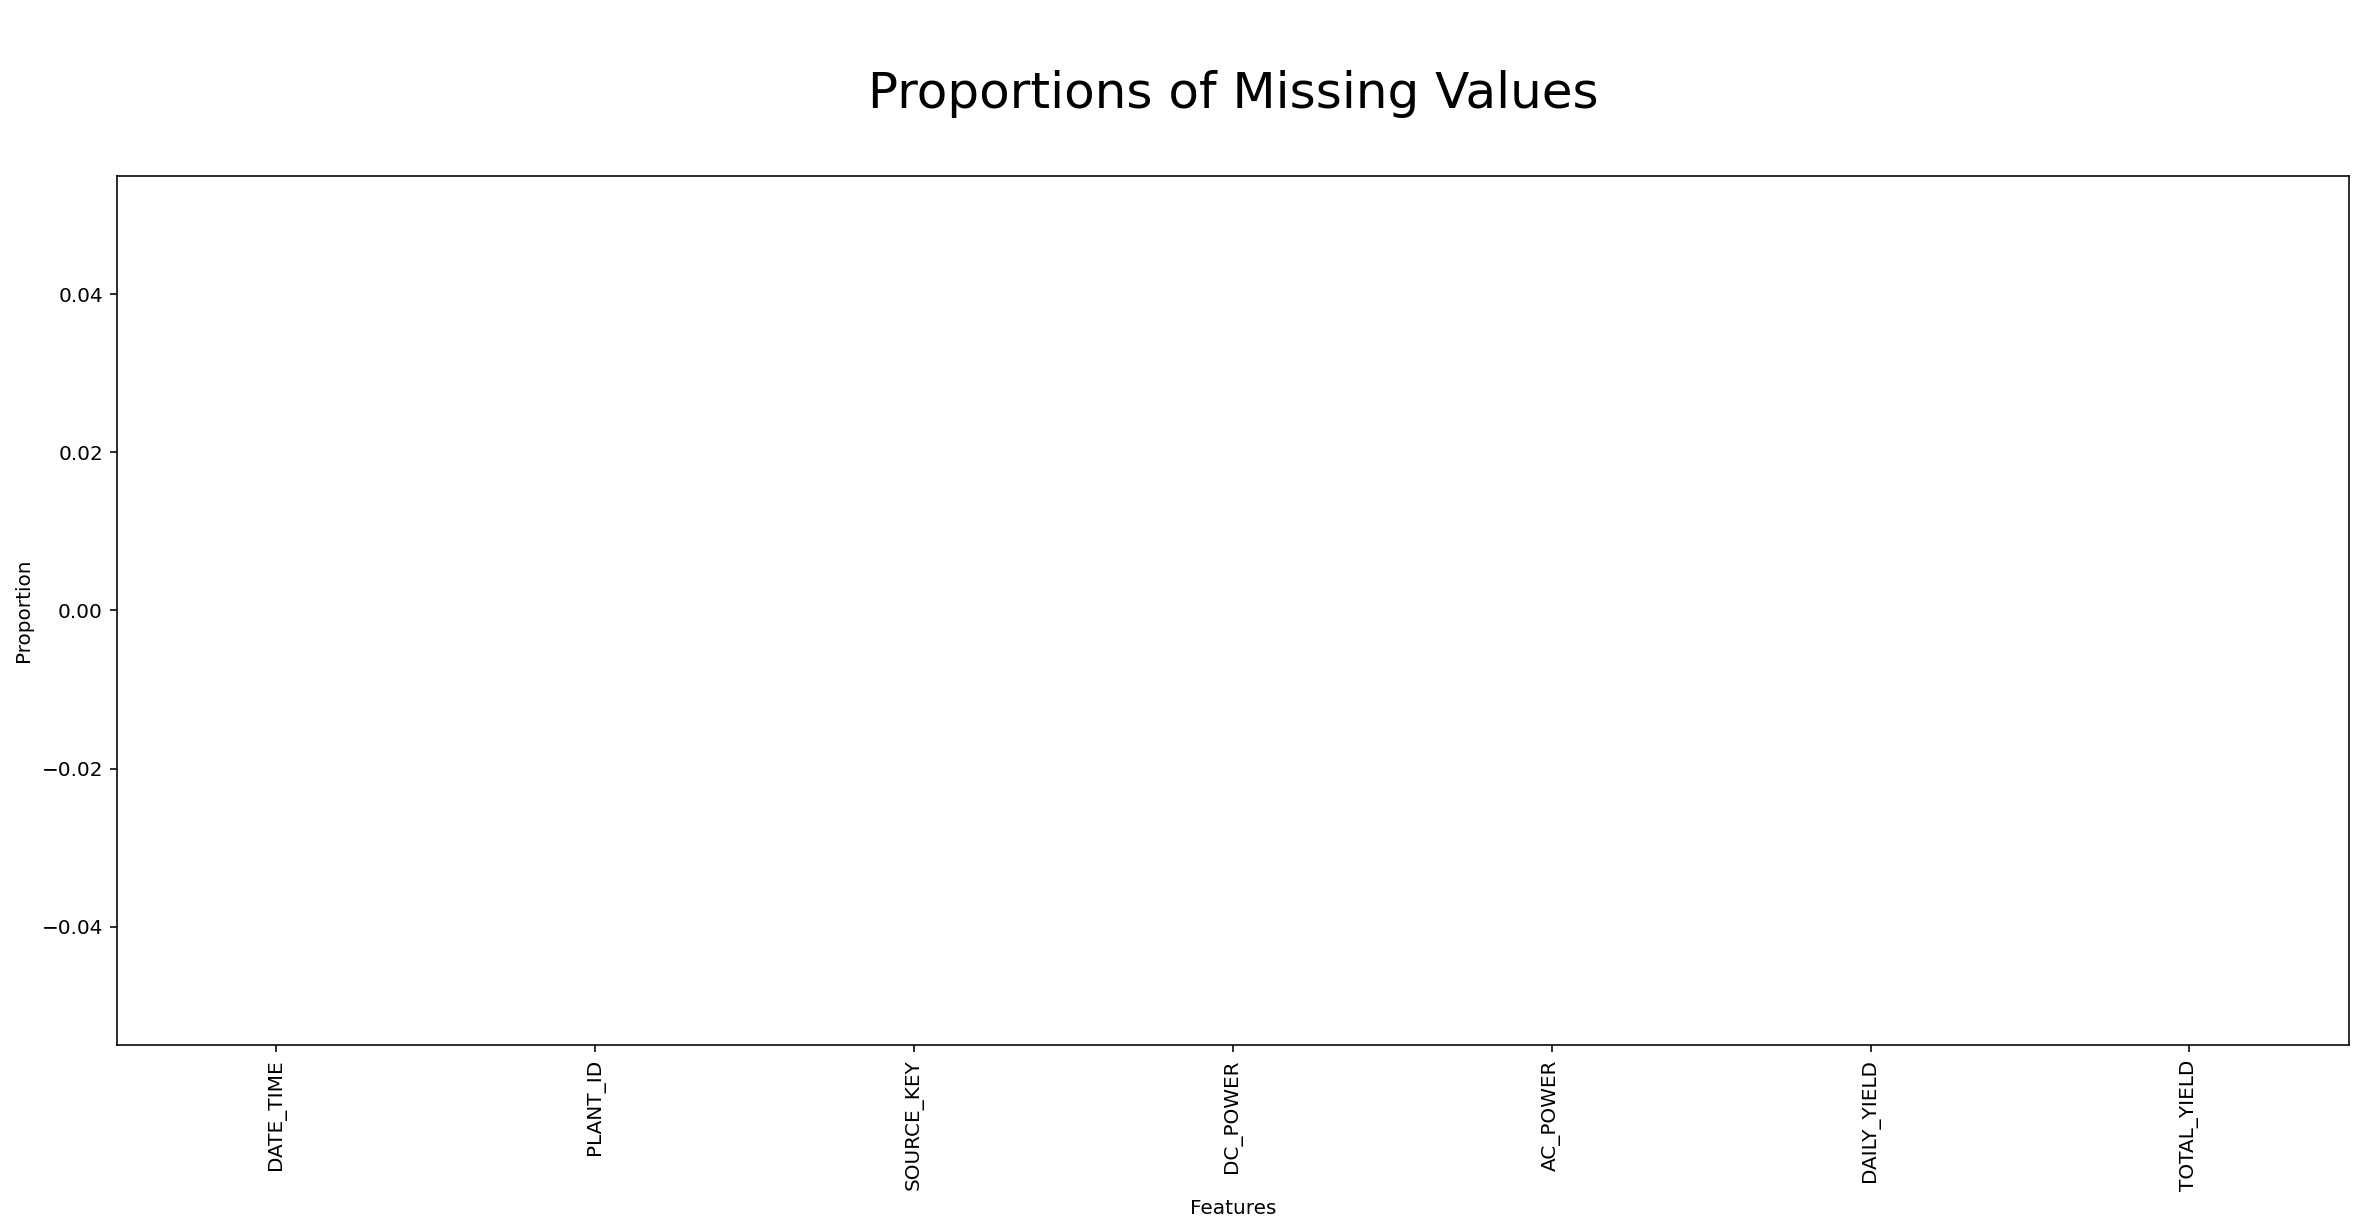

In [63]:
missing=plant1_generation.isna().sum().sort_values(ascending=False)
plt.figure(figsize=(20,8))
(missing/68778).plot(kind="bar", color="pink") #400 is the number of patients/rows/examples/observations/lines in our data
#The "missing" variable contains the numbers of missing values, so we divide by 400 to get the proportions.
plt.title('\nProportions of Missing Values\n', fontsize=25)
plt.ylabel("Proportion")
plt.xlabel("Features")
plt.show()


In [11]:
plant1_generation.duplicated().sum() #finding duplicates in dataframe

0

DATASET 1B

In [12]:
plant1_weather = pd.read_csv('../input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv')
plant1_weather#reading and printing dataset

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [13]:
plant1_weather.dtypes #displays the datatypes of respective columns

DATE_TIME               object
PLANT_ID                 int64
SOURCE_KEY              object
AMBIENT_TEMPERATURE    float64
MODULE_TEMPERATURE     float64
IRRADIATION            float64
dtype: object

In [14]:
plant1_weather.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182.0,3182.000000,3182.000000,3182.000000
mean,4135001.0,25.531606,31.091015,0.228313
std,0.0,3.354856,12.261222,0.300836
min,4135001.0,20.398505,18.140415,0.000000
25%,4135001.0,22.705182,21.090553,0.000000
50%,4135001.0,24.613814,24.618060,0.024653
75%,4135001.0,27.920532,41.307840,0.449588
max,4135001.0,35.252486,65.545714,1.221652


In [15]:
row,col=plant1_weather.shape
print(f"Number of rows:{row}")  #prints number of rows
print(f"Number of columns:{col}") #prints number of columns

Number of rows:3182
Number of columns:6


In [16]:
plant1_weather.isnull().sum() #finding total missing values in each column

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

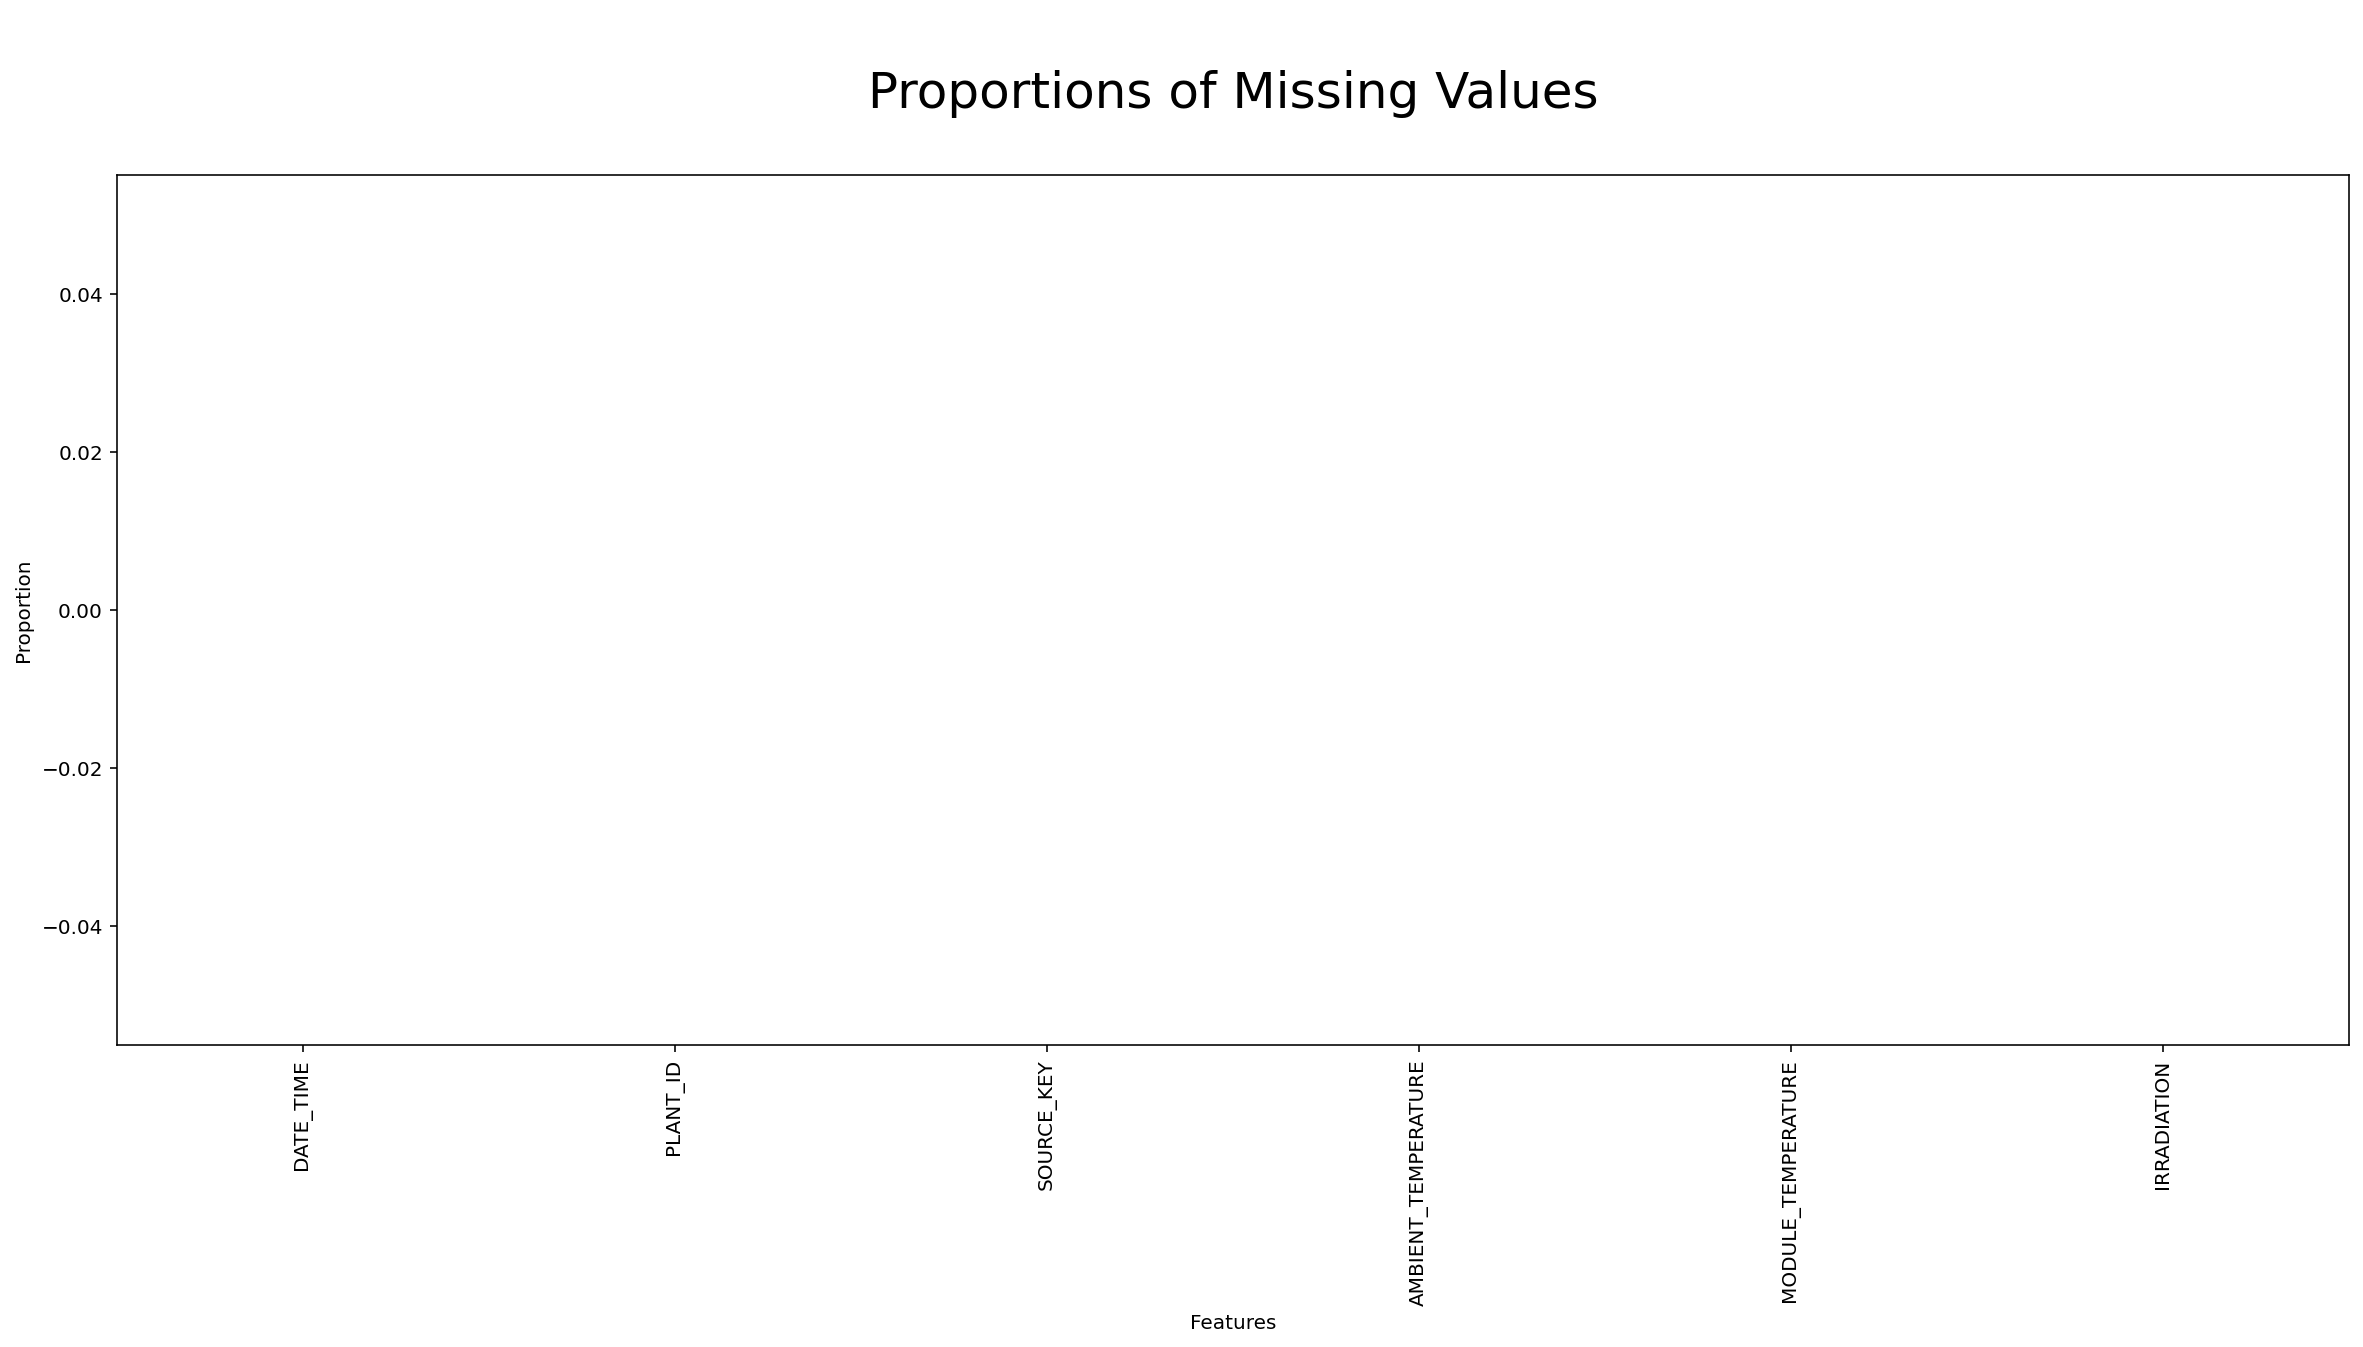

In [64]:
missing=plant1_weather.isna().sum().sort_values(ascending=False)
plt.figure(figsize=(20,8))
(missing/3182).plot(kind="bar", color="pink") 
plt.title('\nProportions of Missing Values\n', fontsize=25)
plt.ylabel("Proportion")
plt.xlabel("Features")
plt.show()


In [17]:
plant1_weather.duplicated().sum() #finding duplicates in dataframe

0

DATASET 2A

In [18]:
plant2_generation = pd.read_csv('../input/solar-power-generation-data/Plant_2_Generation_Data.csv')
plant2_generation#reading and printing dataset

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07
...,...,...,...,...,...,...,...
67693,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.000000,5.207580e+05
67694,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.000000,1.211314e+08
67695,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.000000,2.427691e+06
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08


In [19]:
plant2_generation.dtypes #displays the datatypes of respective columns

DATE_TIME       object
PLANT_ID         int64
SOURCE_KEY      object
DC_POWER       float64
AC_POWER       float64
DAILY_YIELD    float64
TOTAL_YIELD    float64
dtype: object

In [20]:
plant2_generation.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,67698.0,67698.000000,67698.000000,67698.000000,6.769800e+04
mean,4136001.0,246.701961,241.277825,3294.890295,6.589448e+08
std,0.0,370.569597,362.112118,2919.448386,7.296678e+08
min,4136001.0,0.000000,0.000000,0.000000,0.000000e+00
25%,4136001.0,0.000000,0.000000,272.750000,1.996494e+07
50%,4136001.0,0.000000,0.000000,2911.000000,2.826276e+08
75%,4136001.0,446.591667,438.215000,5534.000000,1.348495e+09
max,4136001.0,1420.933333,1385.420000,9873.000000,2.247916e+09


In [21]:
row,col=plant2_generation.shape
print(f"Number of rows:{row}")  #prints number of rows
print(f"Number of columns:{col}") #prints number of columns

Number of rows:67698
Number of columns:7


In [22]:
plant2_generation.isnull().sum() #finding total missing values in each column

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

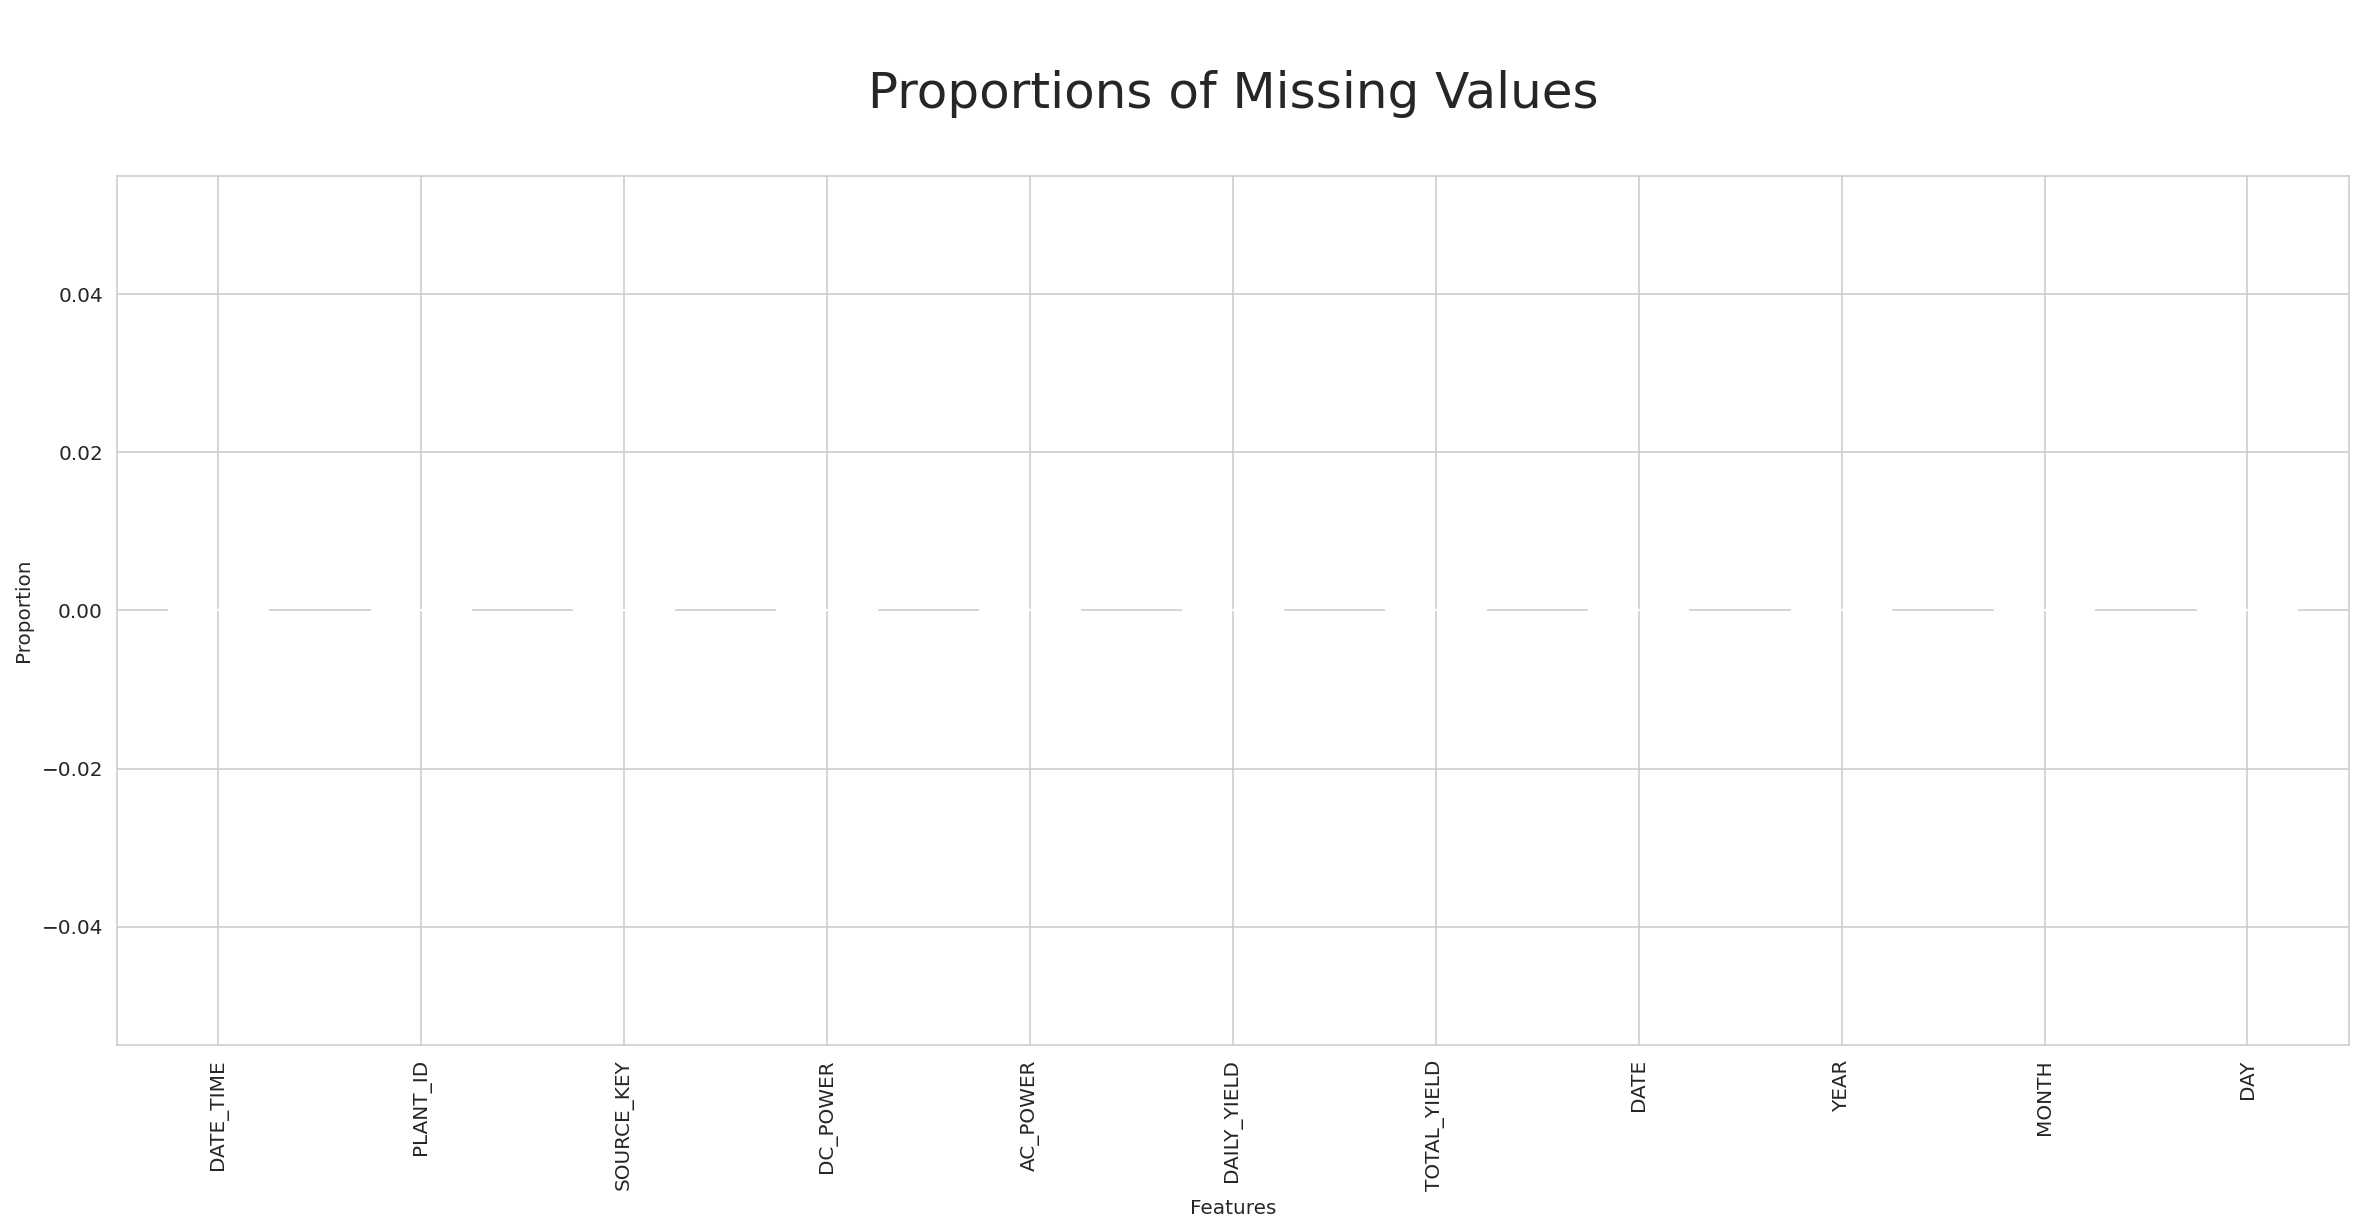

In [76]:
missing=plant2_generation.isna().sum().sort_values(ascending=False)
plt.figure(figsize=(20,8))
(missing/67698).plot(kind="bar", color="pink")
plt.title('\nProportions of Missing Values\n', fontsize=25)
plt.ylabel("Proportion")
plt.xlabel("Features")
plt.show()


In [23]:
plant2_generation.duplicated().sum() #finding duplicates in dataframe

0

DATASET 2B

In [24]:
plant2_weather = pd.read_csv('../input/solar-power-generation-data/Plant_2_Weather_Sensor_Data.csv')
plant2_weather#reading and printing dataset

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0
...,...,...,...,...,...,...
3254,2020-06-17 22:45:00,4136001,iq8k7ZNt4Mwm3w0,23.511703,22.856201,0.0
3255,2020-06-17 23:00:00,4136001,iq8k7ZNt4Mwm3w0,23.482282,22.744190,0.0
3256,2020-06-17 23:15:00,4136001,iq8k7ZNt4Mwm3w0,23.354743,22.492245,0.0
3257,2020-06-17 23:30:00,4136001,iq8k7ZNt4Mwm3w0,23.291048,22.373909,0.0


In [25]:
plant2_weather.dtypes #displays the datatypes of respective columns

DATE_TIME               object
PLANT_ID                 int64
SOURCE_KEY              object
AMBIENT_TEMPERATURE    float64
MODULE_TEMPERATURE     float64
IRRADIATION            float64
dtype: object

In [26]:
plant2_weather.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3259.0,3259.000000,3259.000000,3259.000000
mean,4136001.0,28.069400,32.772408,0.232737
std,0.0,4.061556,11.344034,0.312693
min,4136001.0,20.942385,20.265123,0.000000
25%,4136001.0,24.602135,23.716881,0.000000
50%,4136001.0,26.981263,27.534606,0.019040
75%,4136001.0,31.056757,40.480653,0.438717
max,4136001.0,39.181638,66.635953,1.098766


In [27]:
row,col=plant2_weather.shape
print(f"Number of rows:{row}")  #prints number of rows
print(f"Number of columns:{col}") #prints number of columns

Number of rows:3259
Number of columns:6


In [28]:
plant2_weather.isnull().sum() #finding total missing values in each column

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

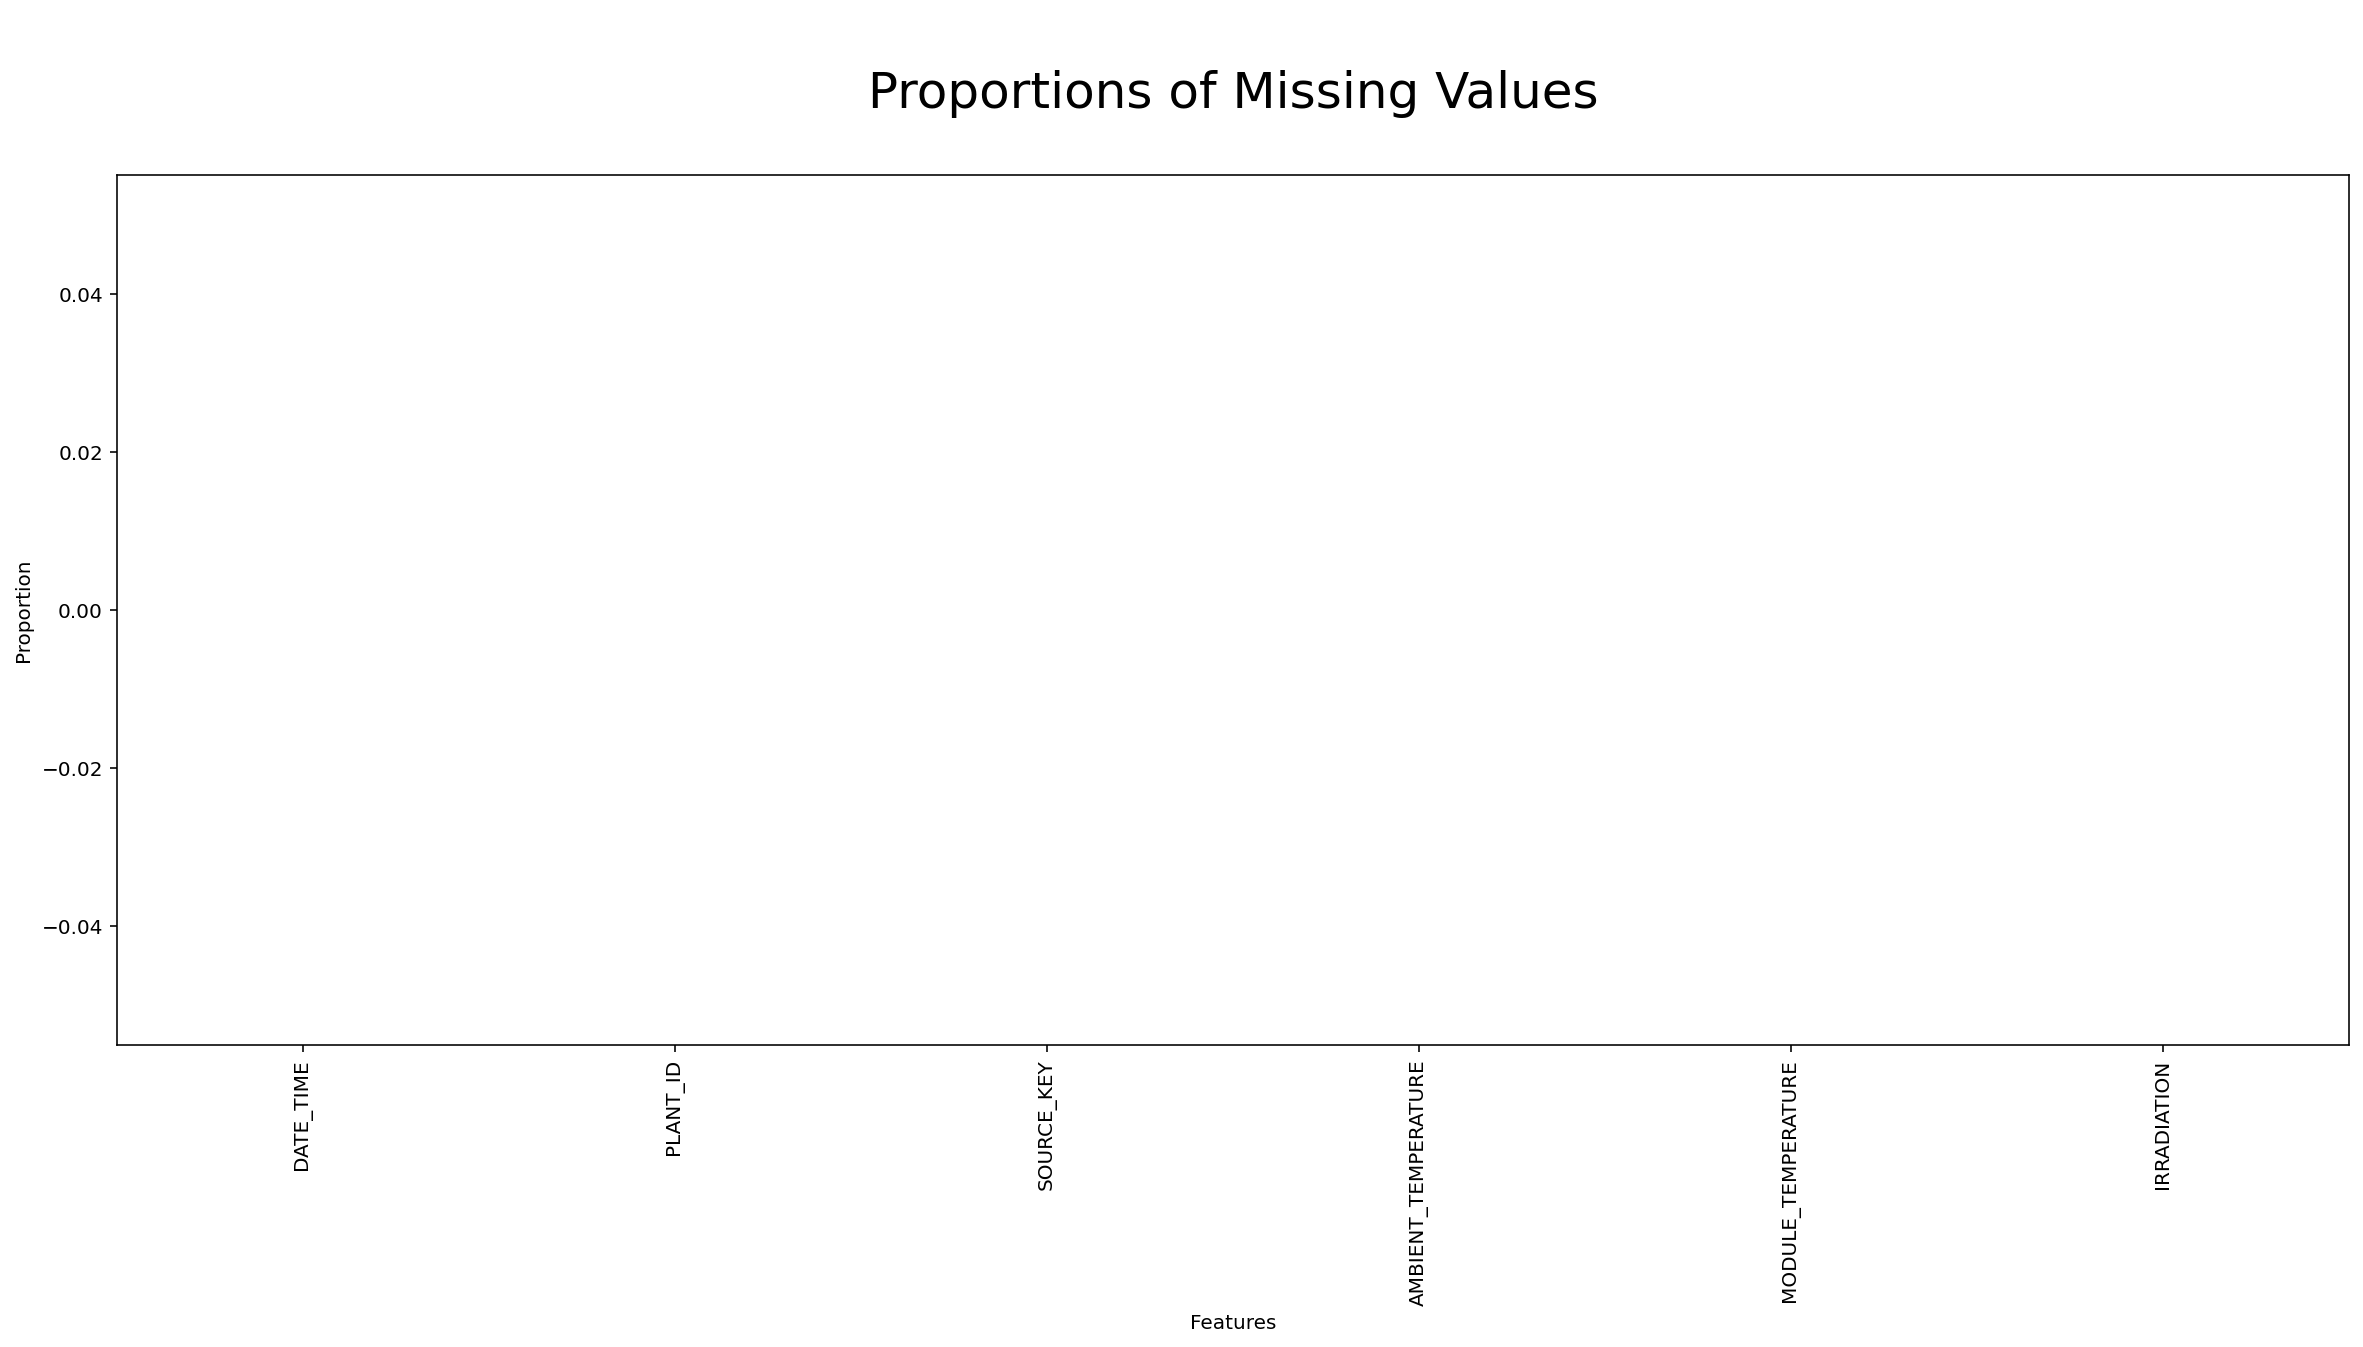

In [65]:
missing=plant2_weather.isna().sum().sort_values(ascending=False)
plt.figure(figsize=(20,8))
(missing/3259).plot(kind="bar", color="pink") 
plt.title('\nProportions of Missing Values\n', fontsize=25)
plt.ylabel("Proportion")
plt.xlabel("Features")
plt.show()


In [29]:
plant2_weather.duplicated().sum() #finding duplicates in dataframe

0

**We can see that the DATE in our dataset is not in format**

In [69]:
plant1_generation['DATE'] = [datetime.strftime(i,format="%d-%m-%Y") for i in pd.to_datetime(plant1_generation.DATE_TIME)]
plant1_generation['DATE'] = pd.to_datetime(plant1_generation['DATE'])
plant2_generation['DATE'] = [datetime.strftime(i,format="%Y-%m-%d") for i in pd.to_datetime(plant2_generation.DATE_TIME)]
plant2_generation['DATE'] = pd.to_datetime(plant2_generation['DATE'])
plant1_weather['DATE'] = [datetime.strftime(i,format="%Y-%m-%d") for i in pd.to_datetime(plant1_weather.DATE_TIME)]
plant1_weather['DATE'] = pd.to_datetime(plant1_weather['DATE'])
plant2_weather['DATE'] = [datetime.strftime(i,format="%Y-%m-%d") for i in pd.to_datetime(plant2_weather.DATE_TIME)]
plant2_weather['DATE'] = pd.to_datetime(plant2_weather['DATE'])

In [70]:
plant1_generation['YEAR'] = [datetime.strftime(i,format="%Y") for i in plant1_generation.DATE]
plant1_generation['MONTH'] = [datetime.strftime(i,format="%m") for i in plant1_generation.DATE]
plant1_generation['DAY'] = [datetime.strftime(i,format="%d") for i in plant1_generation.DATE]
plant2_generation['YEAR'] = [datetime.strftime(i,format="%Y") for i in plant2_generation.DATE]
plant2_generation['MONTH'] = [datetime.strftime(i,format="%m") for i in plant2_generation.DATE]
plant2_generation['DAY'] = [datetime.strftime(i,format="%d") for i in plant2_generation.DATE]
plant1_weather['YEAR'] = [datetime.strftime(i,format="%Y") for i in plant1_weather.DATE]
plant1_weather['MONTH'] = [datetime.strftime(i,format="%m") for i in plant1_weather.DATE]
plant1_weather['DAY'] = [datetime.strftime(i,format="%d") for i in plant1_weather.DATE]
plant2_weather['YEAR'] = [datetime.strftime(i,format="%Y") for i in plant2_weather.DATE]
plant2_weather['MONTH'] = [datetime.strftime(i,format="%m") for i in plant2_weather.DATE]
plant2_weather['DAY'] = [datetime.strftime(i,format="%d") for i in plant2_weather.DATE]

# **Outliers**

**PLANT1_GENERATION**

In [30]:
q1,q3=plant1_generation.DC_POWER.quantile([0.25,0.75])
IQR=q3-q1
lower,upper=q1-(1.5*IQR),q3+(1.5*IQR)

In [31]:
outlying_data=plant1_generation[(plant1_generation.DC_POWER<lower)|(plant1_generation.DC_POWER>upper)]
outlying_data.index.values

array([], dtype=int64)

In [32]:
q1,q3=plant1_generation.AC_POWER.quantile([0.25,0.75])
IQR=q3-q1
lower,upper=q1-(1.5*IQR),q3+(1.5*IQR)

In [33]:
outlying_data=plant1_generation[(plant1_generation.AC_POWER<lower)|(plant1_generation.AC_POWER>upper)]
outlying_data.index.values

array([], dtype=int64)

In [34]:
q1,q3=plant1_generation.DAILY_YIELD.quantile([0.25,0.75])
IQR=q3-q1
lower,upper=q1-(1.5*IQR),q3+(1.5*IQR)

In [35]:
outlying_data=plant1_generation[(plant1_generation.DAILY_YIELD<lower)|(plant1_generation.DAILY_YIELD>upper)]
outlying_data.index.values

array([], dtype=int64)

In [36]:
q1,q3=plant1_generation.TOTAL_YIELD.quantile([0.25,0.75])
IQR=q3-q1
lower,upper=q1-(1.5*IQR),q3+(1.5*IQR)

In [37]:
outlying_data=plant1_generation[(plant1_generation.TOTAL_YIELD<lower)|(plant1_generation.TOTAL_YIELD>upper)]
outlying_data.index.values

array([], dtype=int64)

**PLANT1_WEATHER**

In [38]:
q1,q3=plant1_weather.AMBIENT_TEMPERATURE.quantile([0.25,0.75])
IQR=q3-q1
lower,upper=q1-(1.5*IQR),q3+(1.5*IQR)

In [39]:
outlying_data=plant1_weather[(plant1_weather.AMBIENT_TEMPERATURE<lower)|(plant1_weather.AMBIENT_TEMPERATURE>upper)]
outlying_data.index.values

array([], dtype=int64)

In [40]:
q1,q3=plant1_weather.MODULE_TEMPERATURE.quantile([0.25,0.75])
IQR=q3-q1
lower,upper=q1-(1.5*IQR),q3+(1.5*IQR)

In [41]:
outlying_data=plant1_weather[(plant1_weather.MODULE_TEMPERATURE<lower)|(plant1_weather.MODULE_TEMPERATURE>upper)]
outlying_data.index.values

array([], dtype=int64)

In [42]:
q1,q3=plant1_weather.IRRADIATION.quantile([0.25,0.75])
IQR=q3-q1
lower,upper=q1-(1.5*IQR),q3+(1.5*IQR)

In [43]:
outlying_data=plant1_weather[(plant1_weather.IRRADIATION<lower)|(plant1_weather.IRRADIATION>upper)]
outlying_data.index.values


array([1407, 2854])

As there are only two values which are outliers, we do not do anything with them.

**PLANT2_GENERATION**

In [44]:
q1,q3=plant2_generation.DC_POWER.quantile([0.25,0.75])
IQR=q3-q1
lower,upper=q1-(1.5*IQR),q3+(1.5*IQR)

In [45]:
outlying_data=plant2_generation[(plant2_generation.DC_POWER>=lower)|(plant2_generation.DC_POWER>upper)]
outlying_data.index.values

array([    0,     1,     2, ..., 67695, 67696, 67697])

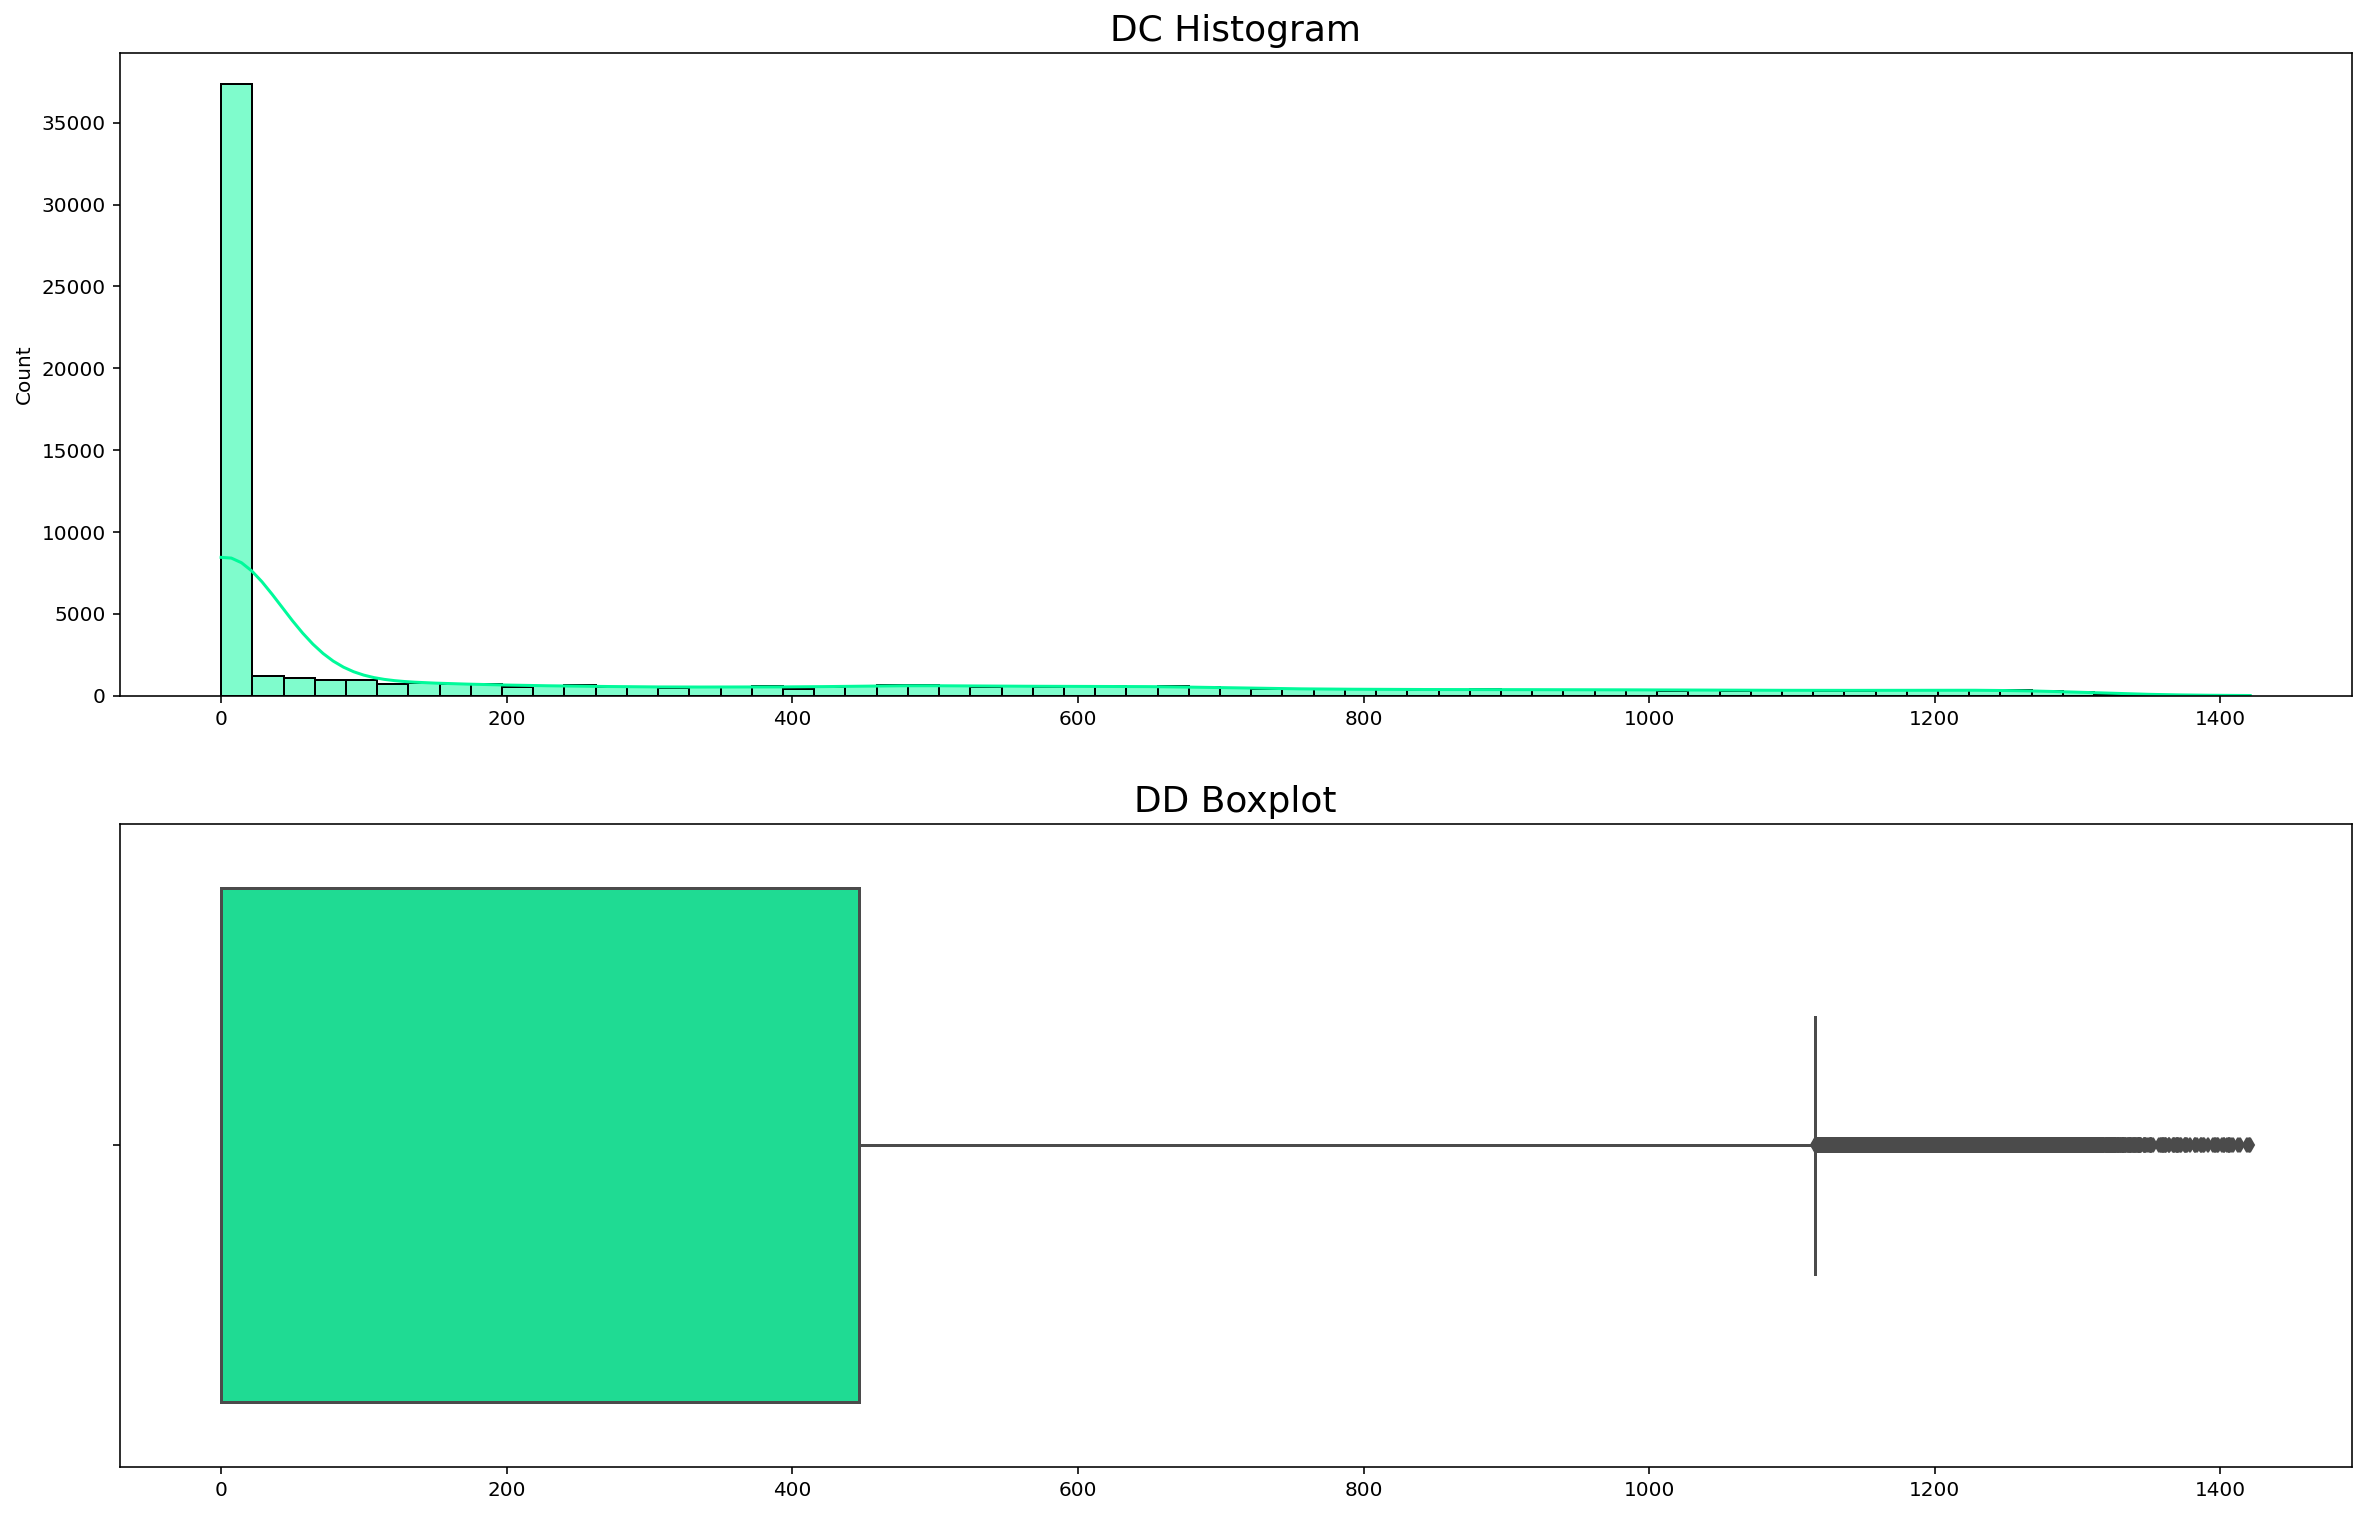

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,13)) 
sns.histplot(data=plant2_generation, x="DC_POWER", kde=True, color="mediumspringgreen", ax=axes[0])
sns.boxplot(data=plant2_generation, x="DC_POWER", color="mediumspringgreen", ax=axes[1])
axes[0].set_title("DC Histogram", fontsize=18)
axes[1].set_title("DD Boxplot", fontsize=18)
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
plt.show()

In [47]:
plant2_generation["DC_POWER"].mean()

246.7019608878177

In [48]:
plant2_generation.DC_POWER = np.where(plant2_generation.DC_POWER > upper,
                                      
    plant2_generation.DC_POWER.mean(),

       np.where(plant2_generation.DC_POWER < lower, plant2_generation.DC_POWER.mean(),plant2_generation.DC_POWER)
       )
#plant2_generation["DC_POWER"].fillna(plant2_generation["DC_POWER"].mean(), inplace=True)

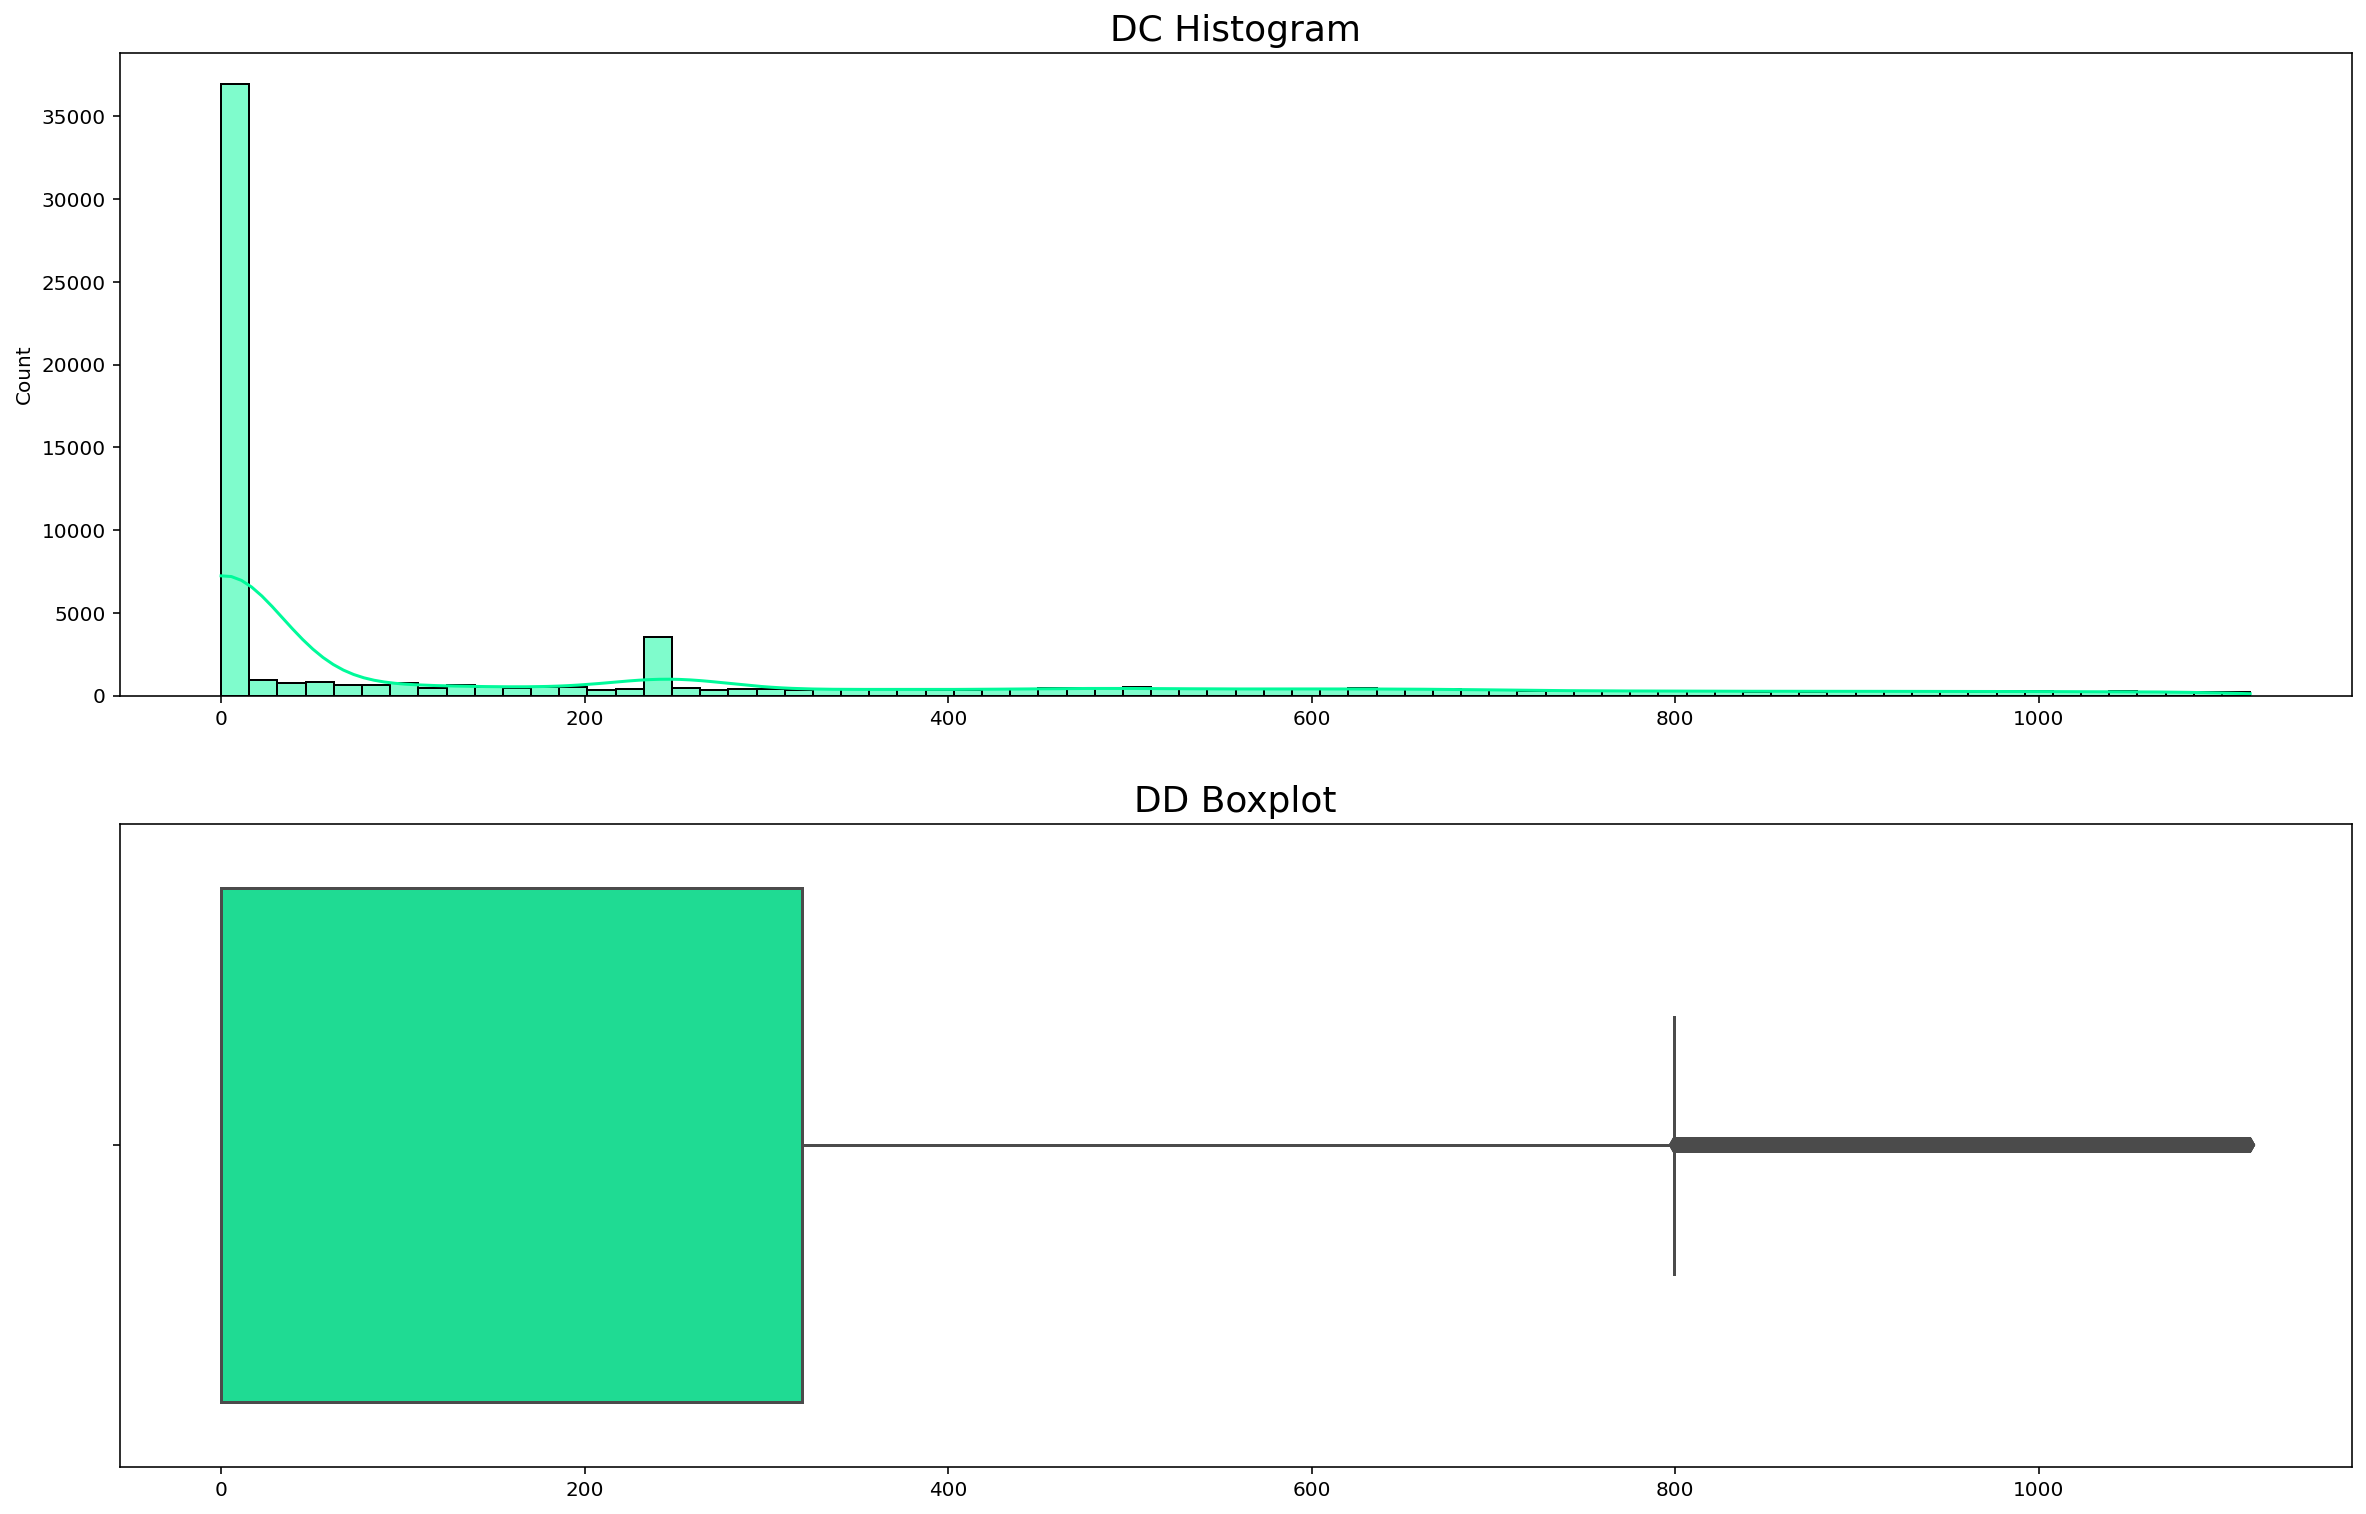

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,13)) 
sns.histplot(data=plant2_generation, x="DC_POWER", kde=True, color="mediumspringgreen", ax=axes[0])
sns.boxplot(data=plant2_generation, x="DC_POWER", color="mediumspringgreen", ax=axes[1])
axes[0].set_title("DC Histogram", fontsize=18)
axes[1].set_title("DD Boxplot", fontsize=18)
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
plt.show()

In [50]:
q1,q3=plant2_generation.AC_POWER.quantile([0.25,0.75])
IQR=q3-q1
lower,upper=q1-(1.5*IQR),q3+(1.5*IQR)

In [51]:
outlying_data=plant2_generation[(plant2_generation.AC_POWER<lower)|(plant2_generation.AC_POWER>upper)]
outlying_data.index.values

array([  884,   893,   895, ..., 64501, 64505, 64507])

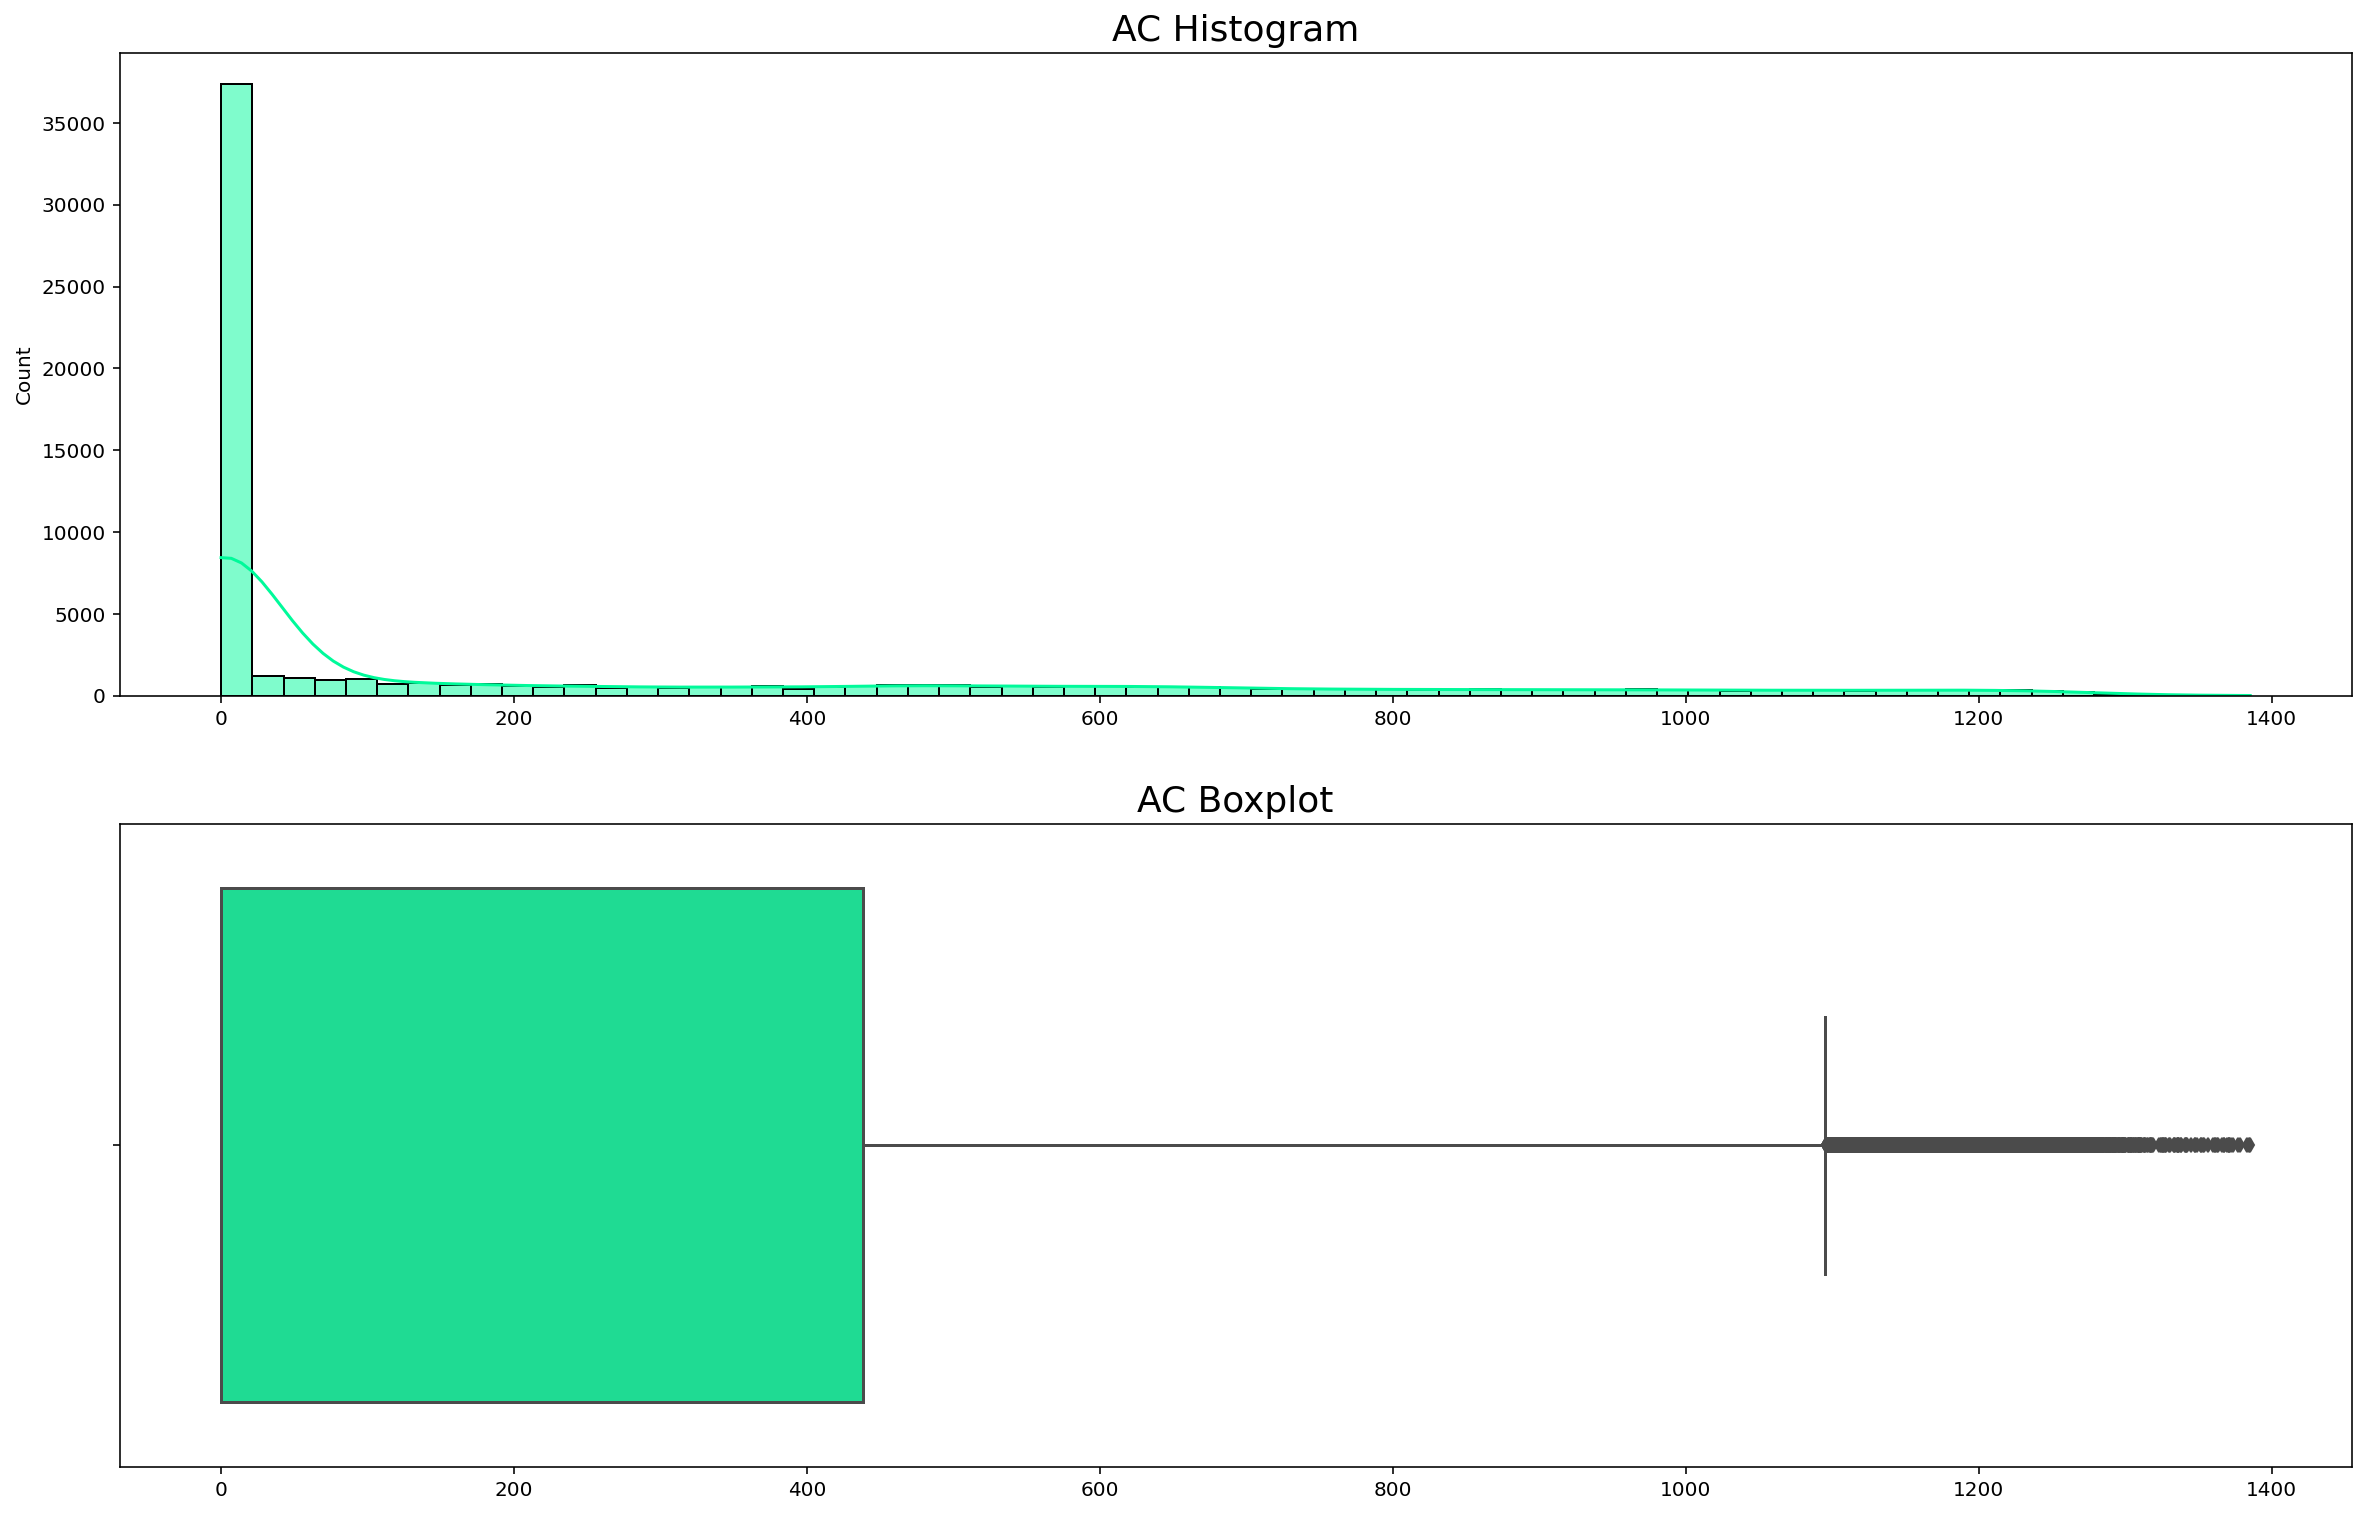

In [52]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,13)) 
sns.histplot(data=plant2_generation, x="AC_POWER", kde=True, color="mediumspringgreen", ax=axes[0])
sns.boxplot(data=plant2_generation, x="AC_POWER", color="mediumspringgreen", ax=axes[1])
axes[0].set_title("AC Histogram", fontsize=18)
axes[1].set_title("AC Boxplot", fontsize=18)
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
plt.show()

In [53]:
q1,q3=plant2_generation.DAILY_YIELD.quantile([0.25,0.75])
IQR=q3-q1
lower,upper=q1-(1.5*IQR),q3+(1.5*IQR)

In [54]:
outlying_data=plant2_generation[(plant2_generation.DAILY_YIELD<lower)|(plant2_generation.DAILY_YIELD>upper)]
outlying_data.index.values

array([], dtype=int64)

In [55]:
q1,q3=plant2_generation.TOTAL_YIELD.quantile([0.25,0.75])
IQR=q3-q1
lower,upper=q1-(1.5*IQR),q3+(1.5*IQR)

In [56]:
outlying_data=plant2_generation[(plant2_generation.TOTAL_YIELD<lower)|(plant2_generation.TOTAL_YIELD>upper)]
outlying_data.index.values

array([], dtype=int64)

**PLANT2_WEATHER**

In [57]:
q1,q3=plant2_weather.AMBIENT_TEMPERATURE.quantile([0.25,0.75])
IQR=q3-q1
lower,upper=q1-(1.5*IQR),q3+(1.5*IQR)

In [58]:
outlying_data=plant2_weather[(plant2_weather.AMBIENT_TEMPERATURE<lower)|(plant2_weather.AMBIENT_TEMPERATURE>upper)]
outlying_data.index.values

array([], dtype=int64)

In [59]:
q1,q3=plant2_weather.MODULE_TEMPERATURE.quantile([0.25,0.75])
IQR=q3-q1
lower,upper=q1-(1.5*IQR),q3+(1.5*IQR)

In [60]:
outlying_data=plant2_weather[(plant2_weather.MODULE_TEMPERATURE<lower)|(plant2_weather.MODULE_TEMPERATURE>upper)]
outlying_data.index.values

array([ 143, 1775])

In [61]:
q1,q3=plant2_weather.IRRADIATION.quantile([0.25,0.75])
IQR=q3-q1
lower,upper=q1-(1.5*IQR),q3+(1.5*IQR)

In [62]:
outlying_data=plant2_weather[(plant2_weather.IRRADIATION<lower)|(plant2_weather.IRRADIATION>upper)]
outlying_data.index.values

array([1965])

# **Analysis**

In [66]:
#Are the variables correlated to each other? 
#Are any of the preprocessing techniques needed: dimensionality reduction, range transformation, standardization, etc.? 
#Does PCA help visualize the data? Do we get any insights from histograms/ bar charts/ line plots, etc.?

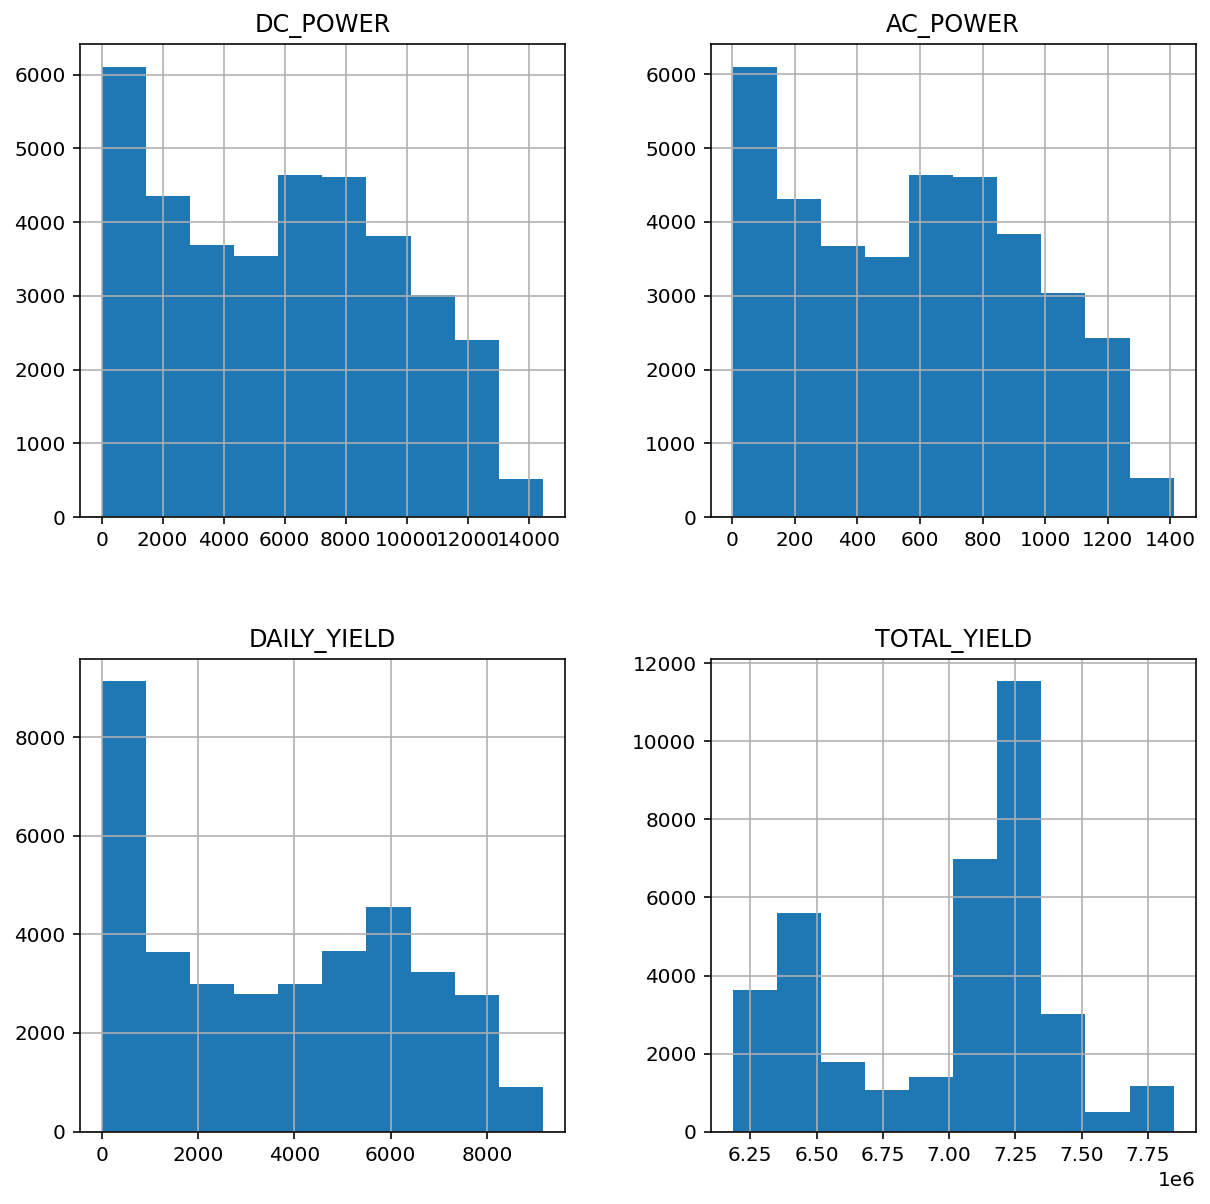

In [67]:
# Histogram of all non zero values
sample_df1 = plant1_generation.loc[:, plant1_generation.columns != 'PLANT_ID']
sample_df1 = sample_df1[(plant1_generation['DAILY_YIELD'] > 0) & (plant1_generation['AC_POWER'] > 0)]
sample_df1.hist(figsize=(10,10))
plt.show()

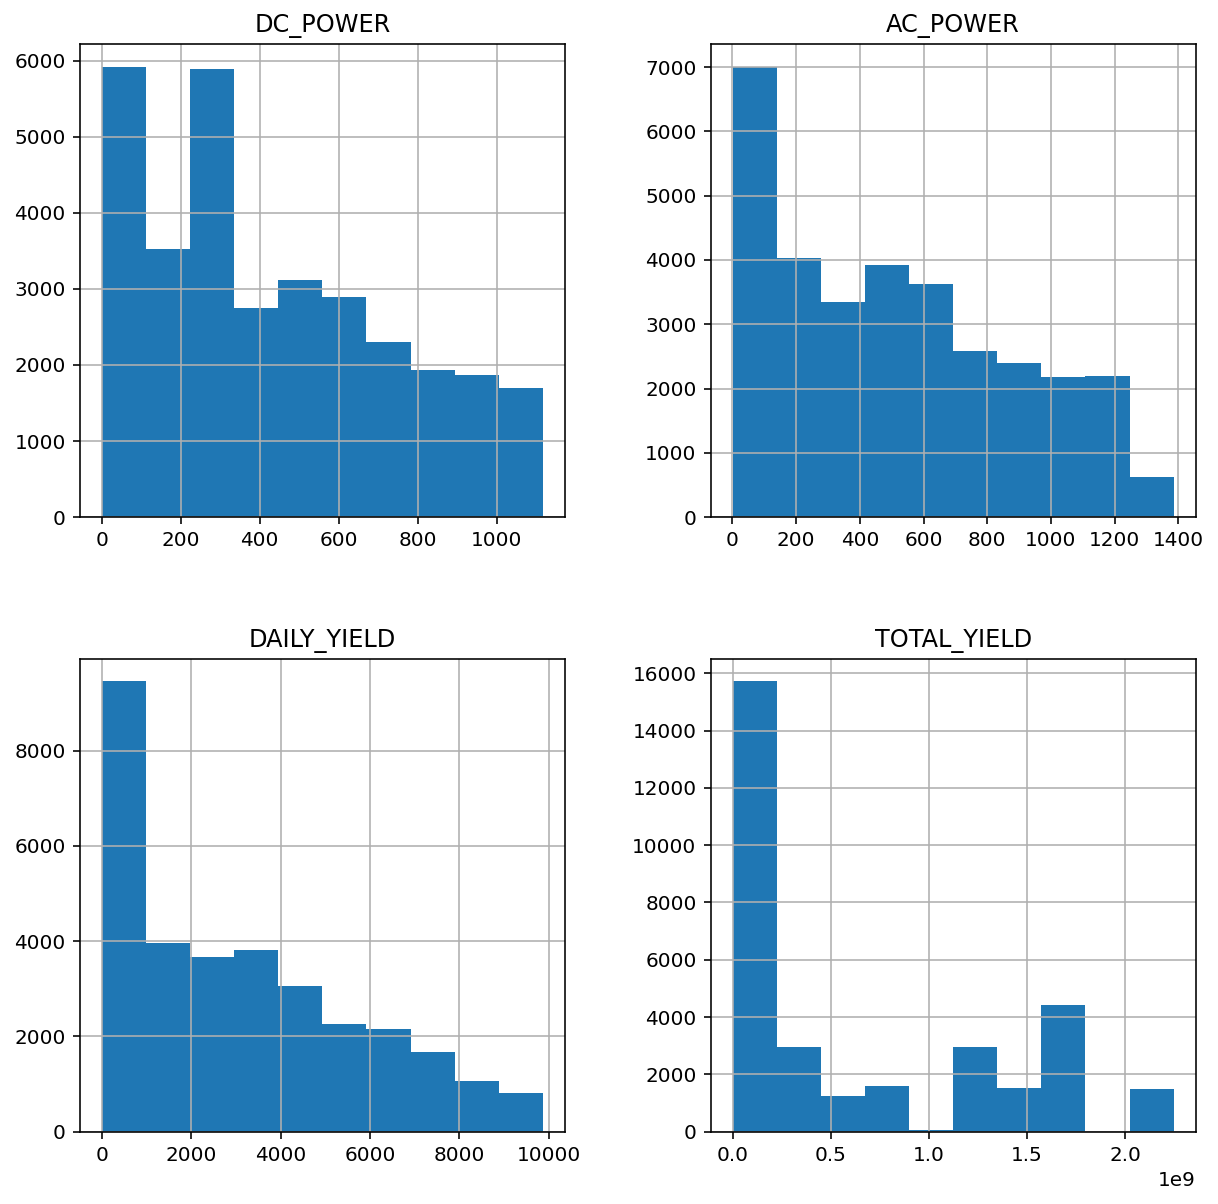

In [68]:
# Histogram of all non zero values
sample_df2 = plant2_generation.loc[:, plant2_generation.columns != 'PLANT_ID']
sample_df2 = sample_df2[(plant2_generation['DAILY_YIELD'] > 0) & (plant2_generation['AC_POWER'] > 0)]
sample_df2.hist(figsize=(10,10))
plt.show()

Observations:
a- Data is very clean without Null values, negatives or infinites.
b- The column names are in uppercase. They will be changed to lowercase.
c- The DATE_TIME column is in text format and will be converted to Timestamp.
d- DC_POWER and AC_POWER seems to have a scale problem since DC_POWER should
   be very similar to AC_POWER but appears to be 10 times bigger instead.
e- PLANT_ID column holds a single value throughout the entire dataset, this
   column will be deleted and the value stored in an external variable to
   reduce the Data Frame memory footprint.

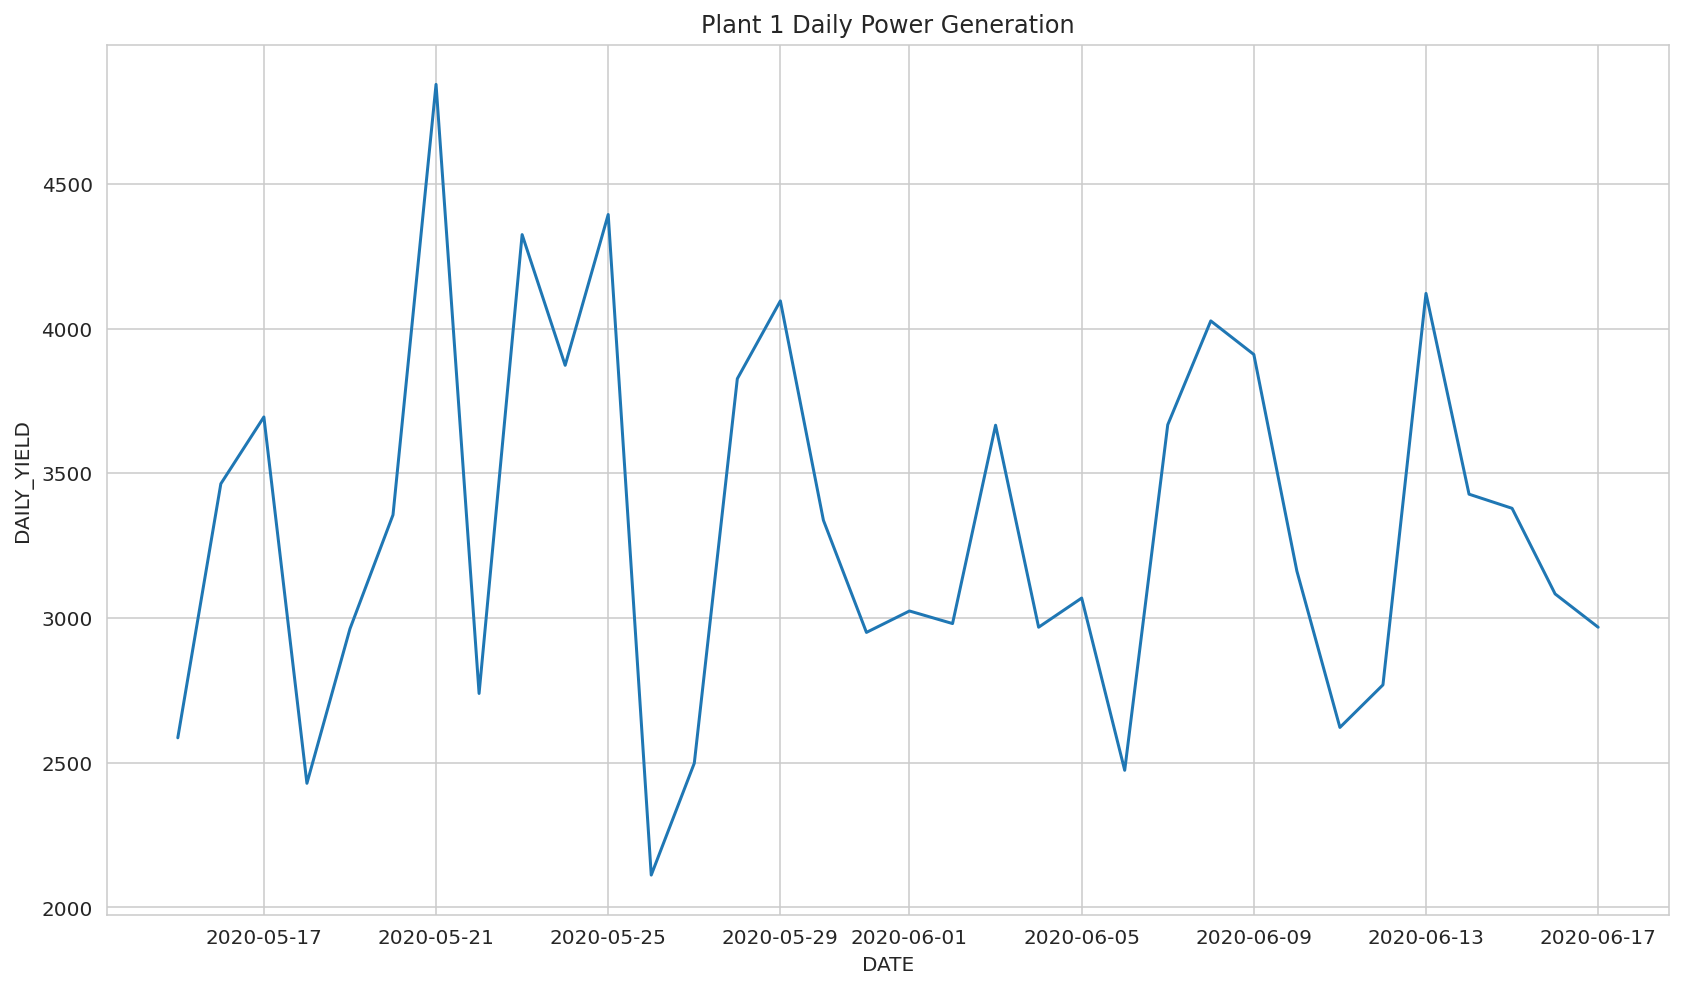

In [71]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,8))
fig=sns.lineplot(data=plant1_generation,x='DATE',y='DAILY_YIELD',ci=None)
fig.set_title('Plant 1 Daily Power Generation')
plt.show()

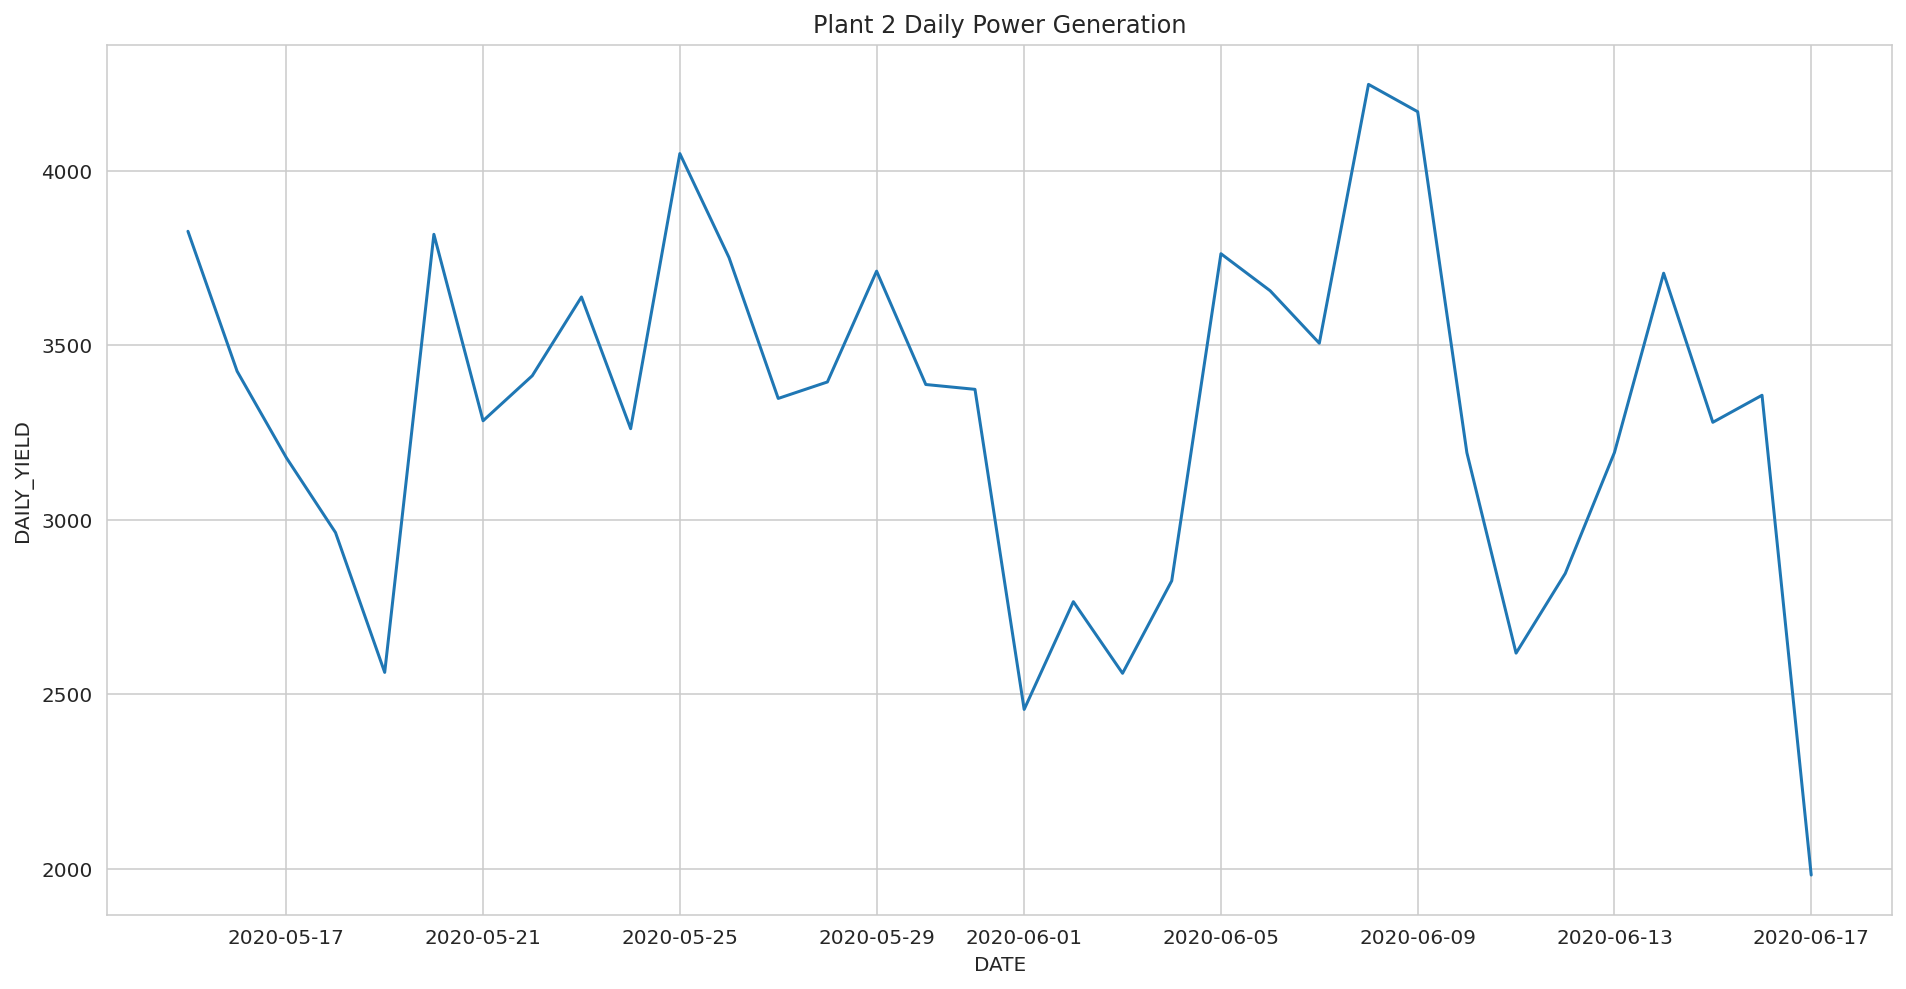

In [72]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
sns.lineplot(data=plant2_generation,x='DATE',y='DAILY_YIELD',ci=None)
plt.title('Plant 2 Daily Power Generation')
plt.show()

# **Extra Info**

In [73]:
plant1_irradiation = plant1_weather.groupby(['DATE']).IRRADIATION.sum()
plant2_irradiation = plant2_weather.groupby(['DATE']).IRRADIATION.sum()

In [74]:
pd.DataFrame({'Date':plant1_irradiation.index,'Plant_1_Daily_Irradiation':plant1_irradiation.values,'Plant2_Daily_Irradiation':plant2_irradiation.values})

,Date,Plant_1_Daily_Irradiation,Plant2_Daily_Irradiation
0,2020-05-15,19.037010,28.559055
1,2020-05-16,18.651690,23.676573
2,2020-05-17,22.931378,21.233595
3,2020-05-18,15.266485,21.495780
4,2020-05-19,18.044861,20.345321
5,2020-05-20,18.245542,26.786871
6,2020-05-21,23.556170,27.191185
7,2020-05-22,22.119123,28.535843
8,2020-05-23,26.106652,28.159981
9,2020-05-24,24.937180,27.426044


In [75]:
print("No. of inverters in Plant_1 : ",len(plant1_generation.SOURCE_KEY.value_counts()))
print("No. of inverters in Plant_2 : ",len(plant2_generation.SOURCE_KEY.value_counts()))

No. of inverters in Plant_1 :  22
No. of inverters in Plant_2 :  22
